In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('daily.csv')
print(data.shape)
data.head()

(10244, 8)


year  month  day  CO2_value  CH4_value   N2O_value    CO_value  SF6_value
0  1995     12   15     360.59    1764.21  313.380000   95.535000   3.340000
1  1995     12   16     361.76    1783.36  313.361786   96.842679   3.343571
2  1995     12   17     360.72    1762.18  313.343571   98.150357   3.347143
3  1995     12   18     360.46    1760.24  313.325357   99.458036   3.350714
4  1995     12   19     360.44    1760.78  313.307143  100.765714   3.354286

In [3]:
# Combine the 'year', 'month', and 'day' columns into a single datetime column
data['date'] = pd.to_datetime(data[['year', 'month', 'day']])

# Display the first few rows of the updated dataframe to verify the new 'date' column
data.head()


year  month  day  CO2_value  CH4_value   N2O_value    CO_value  SF6_value  \
0  1995     12   15     360.59    1764.21  313.380000   95.535000   3.340000   
1  1995     12   16     361.76    1783.36  313.361786   96.842679   3.343571   
2  1995     12   17     360.72    1762.18  313.343571   98.150357   3.347143   
3  1995     12   18     360.46    1760.24  313.325357   99.458036   3.350714   
4  1995     12   19     360.44    1760.78  313.307143  100.765714   3.354286   

        date  
0 1995-12-15  
1 1995-12-16  
2 1995-12-17  
3 1995-12-18  
4 1995-12-19

In [4]:
data

year  month  day  CO2_value  CH4_value   N2O_value    CO_value  \
0      1995     12   15     360.59    1764.21  313.380000   95.535000   
1      1995     12   16     361.76    1783.36  313.361786   96.842679   
2      1995     12   17     360.72    1762.18  313.343571   98.150357   
3      1995     12   18     360.46    1760.24  313.325357   99.458036   
4      1995     12   19     360.44    1760.78  313.307143  100.765714   
...     ...    ...  ...        ...        ...         ...         ...   
10239  2023     12   27     422.24    1954.04  336.770000   88.245000   
10240  2023     12   28     421.55    1946.56  336.770000   88.245000   
10241  2023     12   29     421.68    1943.70  336.770000   88.245000   
10242  2023     12   30     422.33    1948.95  336.770000   88.245000   
10243  2023     12   31     422.33    1949.72  336.770000   88.245000   

       SF6_value       date  
0       3.340000 1995-12-15  
1       3.343571 1995-12-16  
2       3.347143 1995-12-17  
3       3.350714 1995-12-18  
4       3.354286 1995-12-19  
...          ...        ...  
10239  11.420000 2023-12-27  
10240  11.420000 2023-12-28  
10241  11.420000 2023-12-29  
10242  11.420000 2023-12-30  
10243  11.420000 2023-12-31  

[10244 rows x 9 columns]

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

def split_data(data, test_size=0.2, valid_size=0.1):
    """
    Function to split data into train, validation, and test sets.
    
    :param data: DataFrame containing the dataset
    :param test_size: Fraction of data to be used as the test set
    :param valid_size: Fraction of data (from train set) to be used as the validation set
    :return: train, validation, and test sets
    """
    # Initial split to separate out the test set
    train_valid, test = train_test_split(data, test_size=test_size, random_state=42)
    
    # Adjust valid_size to be a fraction of the train_valid set
    valid_size_adjusted = valid_size / (1 - test_size)
    
    # Split the remaining data into training and validation sets
    train, valid = train_test_split(train_valid, test_size=valid_size_adjusted, random_state=42)
    
    return train, valid, test

# Prepare the dataset with selected features and target
features = ['CH4_value', 'N2O_value', 'CO_value']
target = 'CO2_value'
data_modeling = data[features + [target]]

# Split the data
train, valid, test = split_data(data_modeling, test_size=0.2, valid_size=0.1)

# Extract features and target for each set
X_train, y_train = train[features], train[target]
X_valid, y_valid = valid[features], valid[target]
X_test, y_test = test[features], test[target]

# Define models
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "XGBoost": XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42)
}

# Train models and evaluate
results = []
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    
    mse_train = mean_squared_error(y_train, y_pred_train)
    mse_test = mean_squared_error(y_test, y_pred_test)
    r2_train = r2_score(y_train, y_pred_train)
    r2_test = r2_score(y_test, y_pred_test)
    
    results.append({
        "Model": name,
        "MSE Train": mse_train,
        "MSE Test": mse_test,
        "R2 Train": r2_train,
        "R2 Test": r2_test
    })

results_df = pd.DataFrame(results)
results_df


# Define a simpler model set with only Linear Regression for quick execution
simple_models = {
    "Linear Regression": LinearRegression()
}

# Train the simpler model and evaluate
simple_results = []
for name, model in simple_models.items():
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    
    mse_train = mean_squared_error(y_train, y_pred_train)
    mse_test = mean_squared_error(y_test, y_pred_test)
    r2_train = r2_score(y_train, y_pred_train)
    r2_test = r2_score(y_test, y_pred_test)
    
    simple_results.append({
        "Model": name,
        "MSE Train": mse_train,
        "MSE Test": mse_test,
        "R2 Train": r2_train,
        "R2 Test": r2_test
    })

simple_results_df = pd.DataFrame(simple_results)
simple_results_df


Model  MSE Train   MSE Test  R2 Train   R2 Test
0  Linear Regression  38.742912  44.829659  0.875318  0.853792

In [6]:
# Define ratios for splitting the data into different sizes
ratios = [
    (0.1, 0.1),  # 10% test, 10% validation
    (0.2, 0.2),  # 20% test, 20% validation
    (0.25, 0.1),  # 25% test, 10% validation
    (0.3, 0.1),  # 30% test, 10% validation
    (0.15, 0.15)  # 15% test, 15% validation
]

# Initialize a DataFrame to hold all results
all_results = []

# Iterate over each ratio set and perform model training and evaluation
for test_size, valid_size in ratios:
    # Split the data
    train, valid, test = split_data(data_modeling, test_size=test_size, valid_size=valid_size)
    X_train, y_train = train[features], train[target]
    X_test, y_test = test[features], test[target]

    # Run Linear Regression for simplicity
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    
    mse_train = mean_squared_error(y_train, y_pred_train)
    mse_test = mean_squared_error(y_test, y_pred_test)
    r2_train = r2_score(y_train, y_pred_train)
    r2_test = r2_score(y_test, y_pred_test)
    
    # Store results
    all_results.append({
        "Test Size": test_size,
        "Validation Size": valid_size,
        "MSE Train": mse_train,
        "MSE Test": mse_test,
        "R2 Train": r2_train,
        "R2 Test": r2_test
    })

# Convert results to DataFrame
all_results_df = pd.DataFrame(all_results)
all_results_df


Test Size  Validation Size  MSE Train   MSE Test  R2 Train   R2 Test
0       0.10             0.10  39.274751  49.793734  0.873805  0.842862
1       0.20             0.20  39.714908  43.950088  0.871864  0.856660
2       0.25             0.10  39.175834  45.374588  0.874533  0.853534
3       0.30             0.10  39.881067  43.073695  0.871857  0.861233
4       0.15             0.15  40.124311  46.196972  0.871008  0.851077

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

def split_data(data, test_size=0.2, valid_size=0.1):
    train_valid, test = train_test_split(data, test_size=test_size, random_state=42)
    valid_size_adjusted = valid_size / (1 - test_size)
    train, valid = train_test_split(train_valid, test_size=valid_size_adjusted, random_state=42)
    return train, valid, test

# Data preparation
data['date_ordinal'] = data['date'].apply(lambda x: x.toordinal())
features = ['CH4_value', 'N2O_value', 'CO_value']
target = 'CO2_value'
data_modeling = data[features + [target]]

# Splitting ratios
ratios = [
    (0.1, 0.1), (0.2, 0.2), (0.25, 0.1), (0.3, 0.1), (0.15, 0.15)
]

# Models to train
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "XGBoost": XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42)
}

# Storing results
all_results = []

# Training and evaluation
for test_size, valid_size in ratios:
    train, valid, test = split_data(data_modeling, test_size=test_size, valid_size=valid_size)
    X_train, y_train = train[features], train[target]
    X_test, y_test = test[features], test[target]

    for model_name, model in models.items():
        model.fit(X_train, y_train)
        y_pred_train = model.predict(X_train)
        y_pred_test = model.predict(X_test)

        mse_train = mean_squared_error(y_train, y_pred_train)
        mse_test = mean_squared_error(y_test, y_pred_test)
        r2_train = r2_score(y_train, y_pred_train)
        r2_test = r2_score(y_test, y_pred_test)

        all_results.append({
            "Model": model_name,
            "Test Size": test_size,
            "Validation Size": valid_size,
            "MSE Train": mse_train,
            "MSE Test": mse_test,
            "R2 Train": r2_train,
            "R2 Test": r2_test
        })

results_df = pd.DataFrame(all_results)
results_df


Model  Test Size  Validation Size  MSE Train   MSE Test  \
0   Linear Regression       0.10             0.10  39.274751  49.793734   
1       Random Forest       0.10             0.10   0.446758   3.416266   
2       Decision Tree       0.10             0.10   0.000034   5.296678   
3             XGBoost       0.10             0.10   1.383811   3.543988   
4   Linear Regression       0.20             0.20  39.714908  43.950088   
5       Random Forest       0.20             0.20   0.465652   3.434996   
6       Decision Tree       0.20             0.20   0.000335   6.628287   
7             XGBoost       0.20             0.20   1.231781   3.684485   
8   Linear Regression       0.25             0.10  39.175834  45.374588   
9       Random Forest       0.25             0.10   0.481468   3.331681   
10      Decision Tree       0.25             0.10   0.000321   5.759989   
11            XGBoost       0.25             0.10   1.191964   3.737832   
12  Linear Regression       0.30             0.10  39.881067  43.073695   
13      Random Forest       0.30             0.10   0.489426   3.446612   
14      Decision Tree       0.30             0.10   0.000000   6.267857   
15            XGBoost       0.30             0.10   1.203543   4.013200   
16  Linear Regression       0.15             0.15  40.124311  46.196972   
17      Random Forest       0.15             0.15   0.471882   3.600847   
18      Decision Tree       0.15             0.15   0.000287   6.086792   
19            XGBoost       0.15             0.15   1.293122   3.933818   

    R2 Train   R2 Test  
0   0.873805  0.842862  
1   0.998565  0.989219  
2   1.000000  0.983285  
3   0.995554  0.988816  
4   0.871864  0.856660  
5   0.998498  0.988797  
6   0.999999  0.978382  
7   0.996026  0.987983  
8   0.874533  0.853534  
9   0.998458  0.989246  
10  0.999999  0.981407  
11  0.996183  0.987935  
12  0.871857  0.861233  
13  0.998427  0.988896  
14  1.000000  0.979807  
15  0.996133  0.987071  
16  0.871008  0.851077  
17  0.998483  0.988392  
18  0.999999  0.980378  
19  0.995843  0.987319

In [8]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.metrics import make_scorer, r2_score
from sklearn.model_selection import cross_val_score, KFold
import random

# Prepare the data
X = data[['CH4_value', 'N2O_value', 'CO_value']]
y = data['CO2_value']

# Define the models without specific random states
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=100),
    "Decision Tree": DecisionTreeRegressor(),
    "XGBoost": XGBRegressor(objective='reg:squarederror', n_estimators=100)
}

# Cross-validation setup without fixed random state
kf = KFold(n_splits=5, shuffle=True)
mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)
r2_scorer = make_scorer(r2_score)

# Storing results
loop_results = []

# Perform k-fold cross-validation loop 5 times
for _ in range(5):
    # Shuffle the seed for diversity in splits
    random.seed()
    kf = KFold(n_splits=5, shuffle=True)  # Update KFold with new random state
    results = []
    
    for name, model in models.items():
        mse_scores = cross_val_score(model, X, y, cv=kf, scoring=mse_scorer)
        r2_scores = cross_val_score(model, X, y, cv=kf, scoring=r2_scorer)
        
        results.append({
            "Model": name,
            "MSE": -mse_scores.mean(),  # Negate to convert scores to positive values
            "R2": r2_scores.mean()
        })
    
    loop_results.append(results)  # Store results for each loop

# Return the results for each loop
loop_results


[[{'Model': 'Linear Regression',
   'MSE': 40.74271252661585,
   'R2': 0.8684575640046459},
  {'Model': 'Random Forest',
   'MSE': 3.181063241143666,
   'R2': 0.9898204736100285},
  {'Model': 'Decision Tree',
   'MSE': 5.481063116039931,
   'R2': 0.982233047605656},
  {'Model': 'XGBoost', 'MSE': 3.5424399428307907, 'R2': 0.9884613811916315}],
 [{'Model': 'Linear Regression',
   'MSE': 41.21287705105716,
   'R2': 0.8702241792839637},
  {'Model': 'Random Forest',
   'MSE': 3.3656873260506166,
   'R2': 0.9899004117901022},
  {'Model': 'Decision Tree',
   'MSE': 5.978143133884389,
   'R2': 0.9823731159787957},
  {'Model': 'XGBoost', 'MSE': 3.635069184705229, 'R2': 0.9881901475003246}],
 [{'Model': 'Linear Regression',
   'MSE': 41.86184245866677,
   'R2': 0.8675297726971323},
  {'Model': 'Random Forest',
   'MSE': 3.1694410602019003,
   'R2': 0.9897698224728417},
  {'Model': 'Decision Tree',
   'MSE': 5.658570559396051,
   'R2': 0.9823643992183542},
  {'Model': 'XGBoost', 'MSE': 3.61004686

In [9]:
# Create a linear regression model
linear_regression = LinearRegression()

# Set up cross-validation with 5 folds
kf = KFold(n_splits=5, shuffle=True)  # Shuffle data for diversity in splits
mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)  # MSE scoring
r2_scorer = make_scorer(r2_score)  # R2 scoring

# List to store results for each loop
loop_results = []

# Loop 5 times to get cross-validation results with linear regression
for _ in range(5):
    # Shuffle random seed to ensure randomness
    random.seed()
    kf = KFold(n_splits=5, shuffle=True)  # Create new KFold with shuffle
    results = []
    
    # Cross-validation with linear regression
    mse_scores = cross_val_score(linear_regression, X, y, cv=kf, scoring=mse_scorer)
    r2_scores = cross_val_score(linear_regression, X, y, cv=kf, scoring=r2_scorer)
    
    # Store the mean MSE and R2 scores
    results.append({
        "MSE": -mse_scores.mean(),  # Convert to positive
        "R2": r2_scores.mean()  # Average R2 score
    })
    
    loop_results.append(results)  # Store results for each loop

# Convert results to a DataFrame
results_df = pd.DataFrame(loop_results)

results_df  # Return the DataFrame with results for each loop


0
0  {'MSE': 42.4674754459498, 'R2': 0.867726265180...
1  {'MSE': 42.15813554414551, 'R2': 0.86368943687...
2  {'MSE': 42.08378406184854, 'R2': 0.86586777853...
3  {'MSE': 41.44376717721051, 'R2': 0.86206707701...
4  {'MSE': 40.83630103598826, 'R2': 0.86940608992...

In [10]:
# # Create a DataFrame to store the results in a structured manner with 4 columns: Model, Loop, MSE, R2
# structured_results = pd.DataFrame(columns=["Model", "Loop", "MSE", "R2"])

# # Append the data from the loop results into the structured DataFrame
# for loop_num, loop_result in enumerate(loop_results, start=1):
#     for result in loop_result:
#         structured_results = structured_results.append({
#             "Model": "Linear Regression",  # Since we're using only linear regression
#             "Loop": loop_num,
#             "MSE": result["MSE"],
#             "R2": result["R2"]
#         }, ignore_index=True)

# structured_results  # Return the structured DataFrame with 4 columns: Model, Loop, MSE, R2

import pandas as pd

# Create a DataFrame to store the results in a structured manner with 4 columns: Model, Loop, MSE, R2
structured_results = pd.DataFrame(columns=["Model", "Loop", "MSE", "R2"])

# Create a list to collect the data
results_list = []

# Append the data from the loop results into the structured DataFrame
for loop_num, loop_result in enumerate(loop_results, start=1):
    for result in loop_result:
        results_list.append({
            "Model": "Linear Regression",  # Since we're using only linear regression
            "Loop": loop_num,
            "MSE": result["MSE"],
            "R2": result["R2"]
        })

# Convert the list of dictionaries to a DataFrame
structured_results = pd.DataFrame(results_list, columns=["Model", "Loop", "MSE", "R2"])

structured_results  # Return the structured DataFrame with 4 columns: Model, Loop, MSE, R2



Model  Loop        MSE        R2
0  Linear Regression     1  42.467475  0.867726
1  Linear Regression     2  42.158136  0.863689
2  Linear Regression     3  42.083784  0.865868
3  Linear Regression     4  41.443767  0.862067
4  Linear Regression     5  40.836301  0.869406

In [11]:
# Shift the CO2_value column by one to create the target for the next day's CO2 value
data['CO2_next_day'] = data['CO2_value'].shift(-1)  # Predict the next day's CO2

# Drop rows with NaN values after shifting
data = data.dropna()

# Define features and target
features = data[['CH4_value', 'N2O_value', 'CO_value']]
target = data['CO2_next_day']

# Define a linear regression model
linear_regression = LinearRegression()

# Set up cross-validation with 5 splits and no fixed random state
kf = KFold(n_splits=5, shuffle=True)
mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)
r2_scorer = make_scorer(r2_score)

# List to store results for 5 loops
loop_results_next_day = []

# Perform cross-validation with linear regression and predict the next day's CO2
for loop_num in range(1, 6):
    results = []
    
    # Cross-validation with linear regression
    mse_scores = cross_val_score(linear_regression, features, target, cv=kf, scoring=mse_scorer)
    r2_scores = cross_val_score(linear_regression, features, target, cv=kf, scoring=r2_scorer)
    
    # Store the results with loop number
    results.append({
        "Model": "Linear Regression",
        "Loop": loop_num,
        "MSE": -mse_scores.mean(),  # Convert to positive
        "R2": r2_scores.mean()  # R2 score
    })
    
    loop_results_next_day.append(results)  # Store results for each loop

# Create a DataFrame to store the results with the required 4 columns
results_df_next_day = pd.DataFrame([{
    "Model": res["Model"],
    "Loop": res["Loop"],
    "MSE": res["MSE"],
    "R2": res["R2"]
} for sublist in loop_results_next_day for res in sublist])

results_df_next_day  # Return the structured DataFrame with 4 columns: Model, Loop, MSE, R2


Model  Loop        MSE        R2
0  Linear Regression     1  41.938210  0.862837
1  Linear Regression     2  41.355158  0.857264
2  Linear Regression     3  41.685998  0.865978
3  Linear Regression     4  42.020665  0.863882
4  Linear Regression     5  41.553746  0.864790

In [12]:

# Shift the CO2_value column by two to create the target for the third day's CO2 value
data['CO2_third_day'] = data['CO2_value'].shift(-2)  # Predict the third day's CO2

# Drop rows with NaN values after shifting
data = data.dropna()

# Define features and target for predicting the third day's CO2 value
features = data[['CH4_value', 'N2O_value', 'CO_value']]
target = data['CO2_third_day']

# Define a linear regression model
linear_regression = LinearRegression()

# Set up cross-validation with 5 splits
kf = KFold(n_splits=5, shuffle=True)  # Shuffle data for diversity
mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)  # MSE scoring
r2_scorer = make_scorer(r2_score)  # R2 scoring

# List to store results for 5 loops
loop_results_third_day = []

# Perform cross-validation with linear regression and predict the third day's CO2
for loop_num in range(1, 6):
    results = []
    
    # Cross-validation with linear regression
    mse_scores = cross_val_score(linear_regression, features, target, cv=kf, scoring=mse_scorer)
    r2_scores = cross_val_score(linear_regression, features, target, cv=kf, scoring=r2_scorer)
    
    # Store the results with loop number
    results.append({
        "Model": "Linear Regression",
        "Loop": loop_num,
        "MSE": -mse_scores.mean(),  # Convert to positive
        "R2": r2_scores.mean()  # Average R2 score
    })
    
    loop_results_third_day.append(results)  # Store results for each loop

# Create a DataFrame to store the results with the required 4 columns
results_df_third_day = pd.DataFrame([{
    "Model": res["Model"],
    "Loop": res["Loop"],
    "MSE": res["MSE"],
    "R2": res["R2"]
} for sublist in loop_results_third_day for res in sublist])

results_df_third_day  # Return the structured DataFrame with 4 columns: Model, Loop, MSE, R2


D:\Temp\ipykernel_302672\1302896190.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['CO2_third_day'] = data['CO2_value'].shift(-2)  # Predict the third day's CO2


Model  Loop        MSE        R2
0  Linear Regression     1  41.803362  0.868033
1  Linear Regression     2  42.615577  0.865721
2  Linear Regression     3  41.260485  0.867549
3  Linear Regression     4  41.662650  0.862662
4  Linear Regression     5  42.202153  0.866202

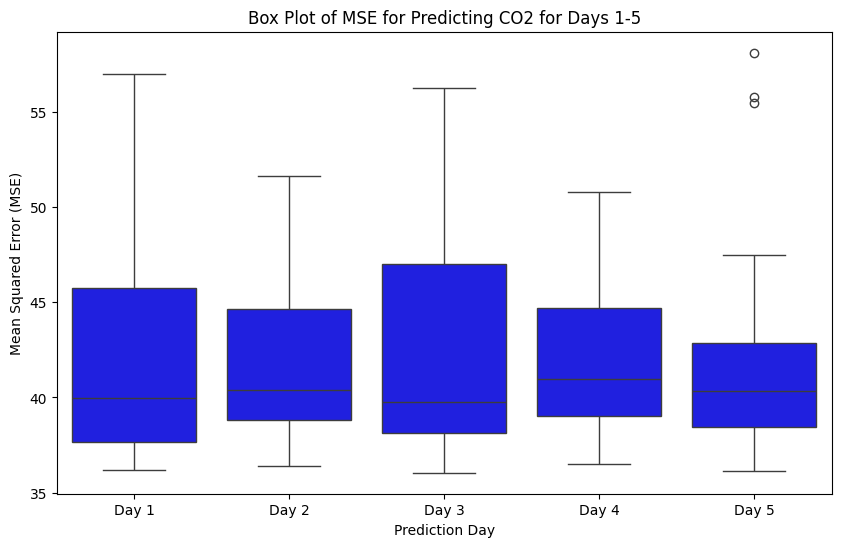

        Day 1      Day 2      Day 3      Day 4      Day 5
0   37.686688  44.652353  36.720149  40.657483  37.490641
1   36.167587  39.227223  40.464326  40.966962  39.388591
2   46.704480  45.366211  56.255003  36.598750  41.778112
3   47.714474  40.431293  43.827706  44.690424  38.446123
4   41.230750  38.104340  39.196841  43.518601  58.084416
5   39.944036  37.305922  45.349259  44.777260  41.981085
6   56.970098  39.089901  36.049765  50.757895  37.918588
7   38.935549  49.361219  42.466802  40.573713  41.024006
8   36.663203  42.323057  38.135093  37.758714  40.259241
9   39.889411  41.126487  51.570762  37.164607  47.477487
10  38.615027  37.742350  37.750322  36.511341  39.490888
11  50.702064  43.119894  36.860707  46.150570  42.873822
12  36.445824  40.382333  49.791111  41.818423  36.618336
13  39.981770  44.727012  38.127696  39.788123  38.152418
14  43.953101  39.979543  51.498810  44.255421  55.422463
15  38.707250  36.424283  38.940233  48.851596  36.145381
16  47.261464 

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
# List of days to predict (1 to 5)
prediction_days = list(range(1, 6))

# Dictionary to store results for each prediction day
day_results = {}

# Set up cross-validation with 5 splits
kf = KFold(n_splits=5, shuffle=True)  # Shuffle data for diversity
mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)  # MSE scoring

# Iterate over each prediction day to build models and calculate MSE
for prediction_day in prediction_days:
    # Shift the CO2_value column to create the target for the specified prediction day
    data[f'CO2_day_{prediction_day}'] = data['CO2_value'].shift(-prediction_day)

    # Drop rows with NaN values after shifting
    data_cleaned = data.dropna(subset=[f'CO2_day_{prediction_day}'])

    # Define features and target for the specified prediction day
    features = data_cleaned[['CH4_value', 'N2O_value', 'CO_value']]
    target = data_cleaned[f'CO2_day_{prediction_day}']

    # List to store MSE for the current prediction day
    mse_scores_list = []

    # Perform cross-validation with linear regression for each prediction day
    for _ in range(5):  # 5 times for each model
        mse_scores = cross_val_score(linear_regression, features, target, cv=kf, scoring=mse_scorer)
        mse_scores_list.extend(-mse_scores)  # Convert to positive

    # Store MSE results for the current prediction day
    day_results[f'Day {prediction_day}'] = mse_scores_list

# Create a DataFrame for the results
results_df_multiple_days = pd.DataFrame.from_dict(day_results, orient='index').transpose()

# Box plot for MSE for each prediction day
plt.figure(figsize=(10, 6))
sns.boxplot(data=results_df_multiple_days, color='blue')
plt.title('Box Plot of MSE for Predicting CO2 for Days 1-5')
plt.xlabel('Prediction Day')
plt.ylabel('Mean Squared Error (MSE)')

plt.show()  # Display the box plot for MSE for prediction days 1-5

print(results_df_multiple_days)
print(data_cleaned)


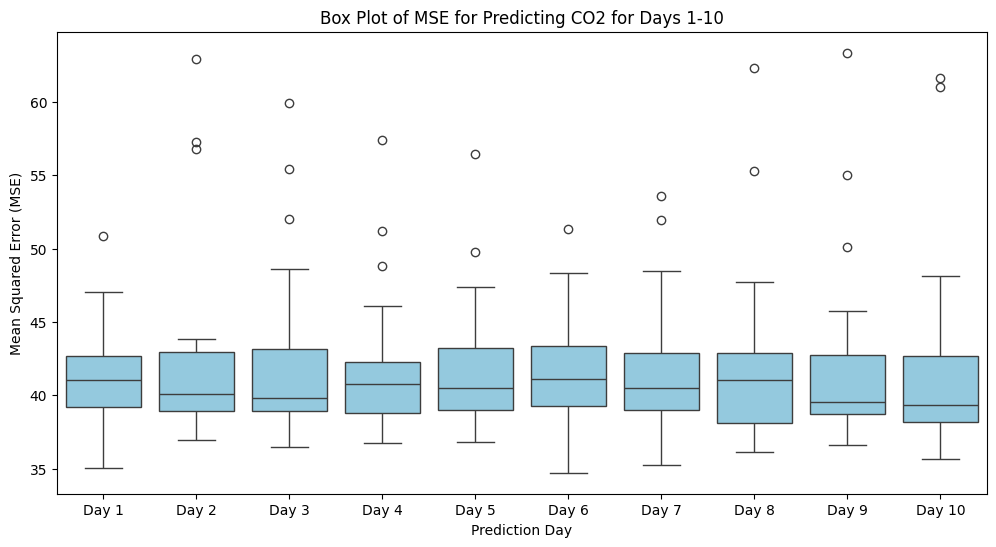

In [14]:
# List of days to predict (1 to 10)
prediction_days_extended = list(range(1, 11))  # Extend to 10 days

# Dictionary to store results for each prediction day
day_results_extended = {}

# Set up cross-validation with 5 splits
kf = KFold(n_splits=5, shuffle=True)  # Shuffle data for diversity
mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)  # MSE scoring

# Iterate over each prediction day to build models and calculate MSE
for prediction_day in prediction_days_extended:
    # Shift the CO2_value column to create the target for the specified prediction day
    data[f'CO2_day_{prediction_day}'] = data['CO2_value'].shift(-prediction_day)

    # Drop rows with NaN values after shifting
    data_cleaned = data.dropna(subset=[f'CO2_day_{prediction_day}'])

    # Define features and target for the specified prediction day
    features = data_cleaned[['CH4_value', 'N2O_value', 'CO_value']]
    target = data_cleaned[f'CO2_day_{prediction_day}']

    # List to store MSE for the current prediction day
    mse_scores_list = []

    # Perform cross-validation with linear regression for each prediction day
    for _ in range(5):  # 5 times for each model
        mse_scores = cross_val_score(linear_regression, features, target, cv=kf, scoring=mse_scorer)
        mse_scores_list.extend(-mse_scores)  # Convert to positive

    # Store MSE results for the current prediction day
    day_results_extended[f'Day {prediction_day}'] = mse_scores_list

# Create a DataFrame for the extended results
results_df_extended = pd.DataFrame.from_dict(day_results_extended, orient='index').transpose()

# Box plot for MSE for each prediction day (1 to 10)
plt.figure(figsize=(12, 6))
sns.boxplot(data=results_df_extended, color="skyblue")
plt.title('Box Plot of MSE for Predicting CO2 for Days 1-10')
plt.xlabel('Prediction Day')
plt.ylabel('Mean Squared Error (MSE)')

plt.show()  # Display the box plot for MSE for prediction days 1-10


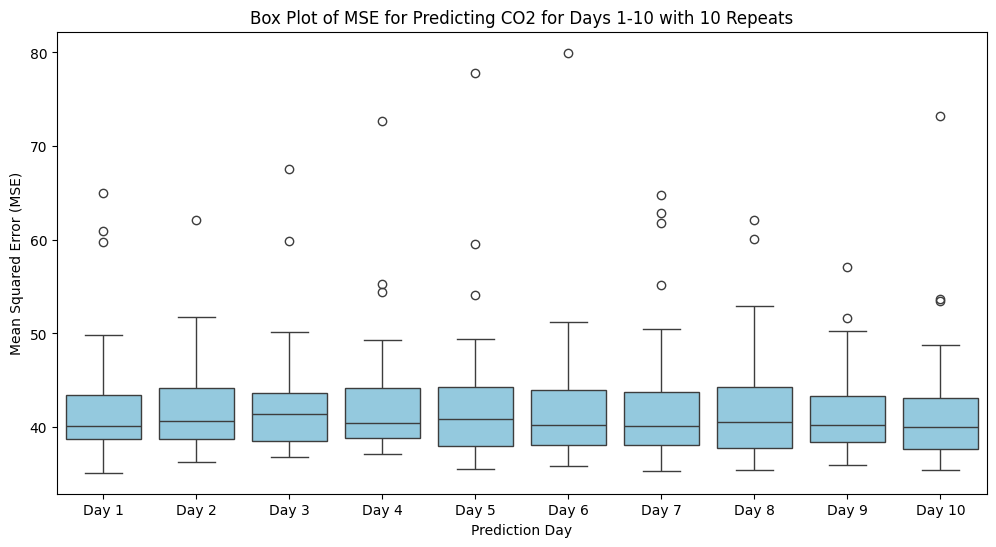

In [15]:
# Extend to 10 repeats for each prediction day (1 to 10)
repeats = 10  # Repeat 10 times for each model

# Dictionary to store results for each prediction day with repeats
day_results_extended_repeats = {}

# Set up cross-validation with 5 splits and 10 repeats
kf = KFold(n_splits=5, shuffle=True)  # Shuffle for diversity
mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)  # MSE scoring

# Iterate over each prediction day to build models with 10 repeats and calculate MSE
for prediction_day in prediction_days_extended:
    # Shift the CO2_value column to create the target for the specified prediction day
    data[f'CO2_day_{prediction_day}'] = data['CO2_value'].shift(-prediction_day)

    # Drop rows with NaN values after shifting
    data_cleaned = data.dropna(subset=[f'CO2_day_{prediction_day}'])

    # Define features and target for the specified prediction day
    features = data_cleaned[['CH4_value', 'N2O_value', 'CO_value']]
    target = data_cleaned[f'CO2_day_{prediction_day}']

    # List to store MSE for the current prediction day with repeats
    mse_scores_list_repeats = []

    # Perform cross-validation with linear regression with 10 repeats for each prediction day
    for _ in range(repeats):  # Repeat 10 times for each model
        mse_scores = cross_val_score(linear_regression, features, target, cv=kf, scoring=mse_scorer)
        mse_scores_list_repeats.extend(-mse_scores)  # Convert to positive

    # Store MSE results for the current prediction day with repeats
    day_results_extended_repeats[f'Day {prediction_day}'] = mse_scores_list_repeats

# Create a DataFrame for the extended results with 10 repeats for each day
results_df_extended_repeats = pd.DataFrame.from_dict(day_results_extended_repeats, orient='index').transpose()

# Box plot for MSE for each prediction day with 10 repeats (1 to 10)
plt.figure(figsize=(12, 6))
sns.boxplot(data=results_df_extended_repeats, color="skyblue")
plt.title('Box Plot of MSE for Predicting CO2 for Days 1-10 with 10 Repeats')
plt.xlabel('Prediction Day')
plt.ylabel('Mean Squared Error (MSE)')

plt.show()  # Display the box plot for MSE for prediction days 1-10 with 10 repeats


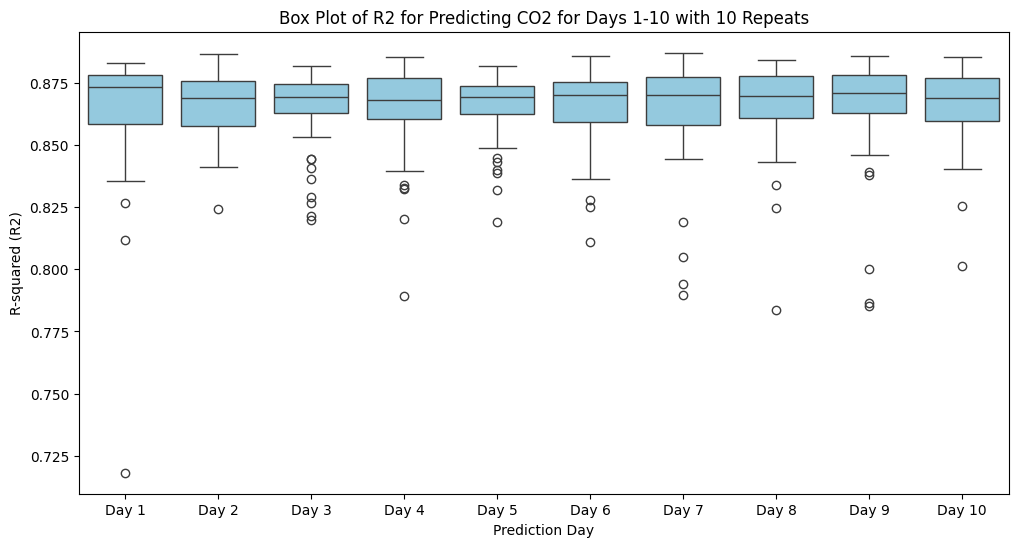

In [16]:
# Perform the same steps as before to collect R2 results for each prediction day with 10 repeats

# Dictionary to store R2 results for each prediction day with repeats
r2_day_results_extended_repeats = {}

# Collect R2 results for each prediction day (1 to 10) with 10 repeats
for prediction_day in prediction_days_extended:
    # Shift the CO2_value column to create the target for the specified prediction day
    data[f'CO2_day_{prediction_day}'] = data['CO2_value'].shift(-prediction_day)

    # Drop rows with NaN values after shifting
    data_cleaned = data.dropna(subset=[f'CO2_day_{prediction_day}'])

    # Define features and target for the specified prediction day
    features = data_cleaned[['CH4_value', 'N2O_value', 'CO_value']]
    target = data_cleaned[f'CO2_day_{prediction_day}']

    # List to store R2 for the current prediction day with repeats
    r2_scores_list_repeats = []

    # Perform cross-validation with linear regression with 10 repeats for each prediction day
    for _ in range(repeats):  # Repeat 10 times for each model
        r2_scores = cross_val_score(linear_regression, features, target, cv=kf, scoring=r2_scorer)
        r2_scores_list_repeats.extend(r2_scores)  # Collect R2 scores

    # Store R2 results for the current prediction day with repeats
    r2_day_results_extended_repeats[f'Day {prediction_day}'] = r2_scores_list_repeats

# Create a DataFrame for the extended R2 results with 10 repeats for each day
r2_results_df_extended_repeats = pd.DataFrame.from_dict(r2_day_results_extended_repeats, orient='index').transpose()

# Box plot for R2 for each prediction day with 10 repeats (1 to 10)
plt.figure(figsize=(12, 6))
sns.boxplot(data=r2_results_df_extended_repeats, color="skyblue")
plt.title('Box Plot of R2 for Predicting CO2 for Days 1-10 with 10 Repeats')
plt.xlabel('Prediction Day')
plt.ylabel('R-squared (R2)')

plt.show()  # Display the box plot for R2 for prediction days 1-10 with 10 repeats


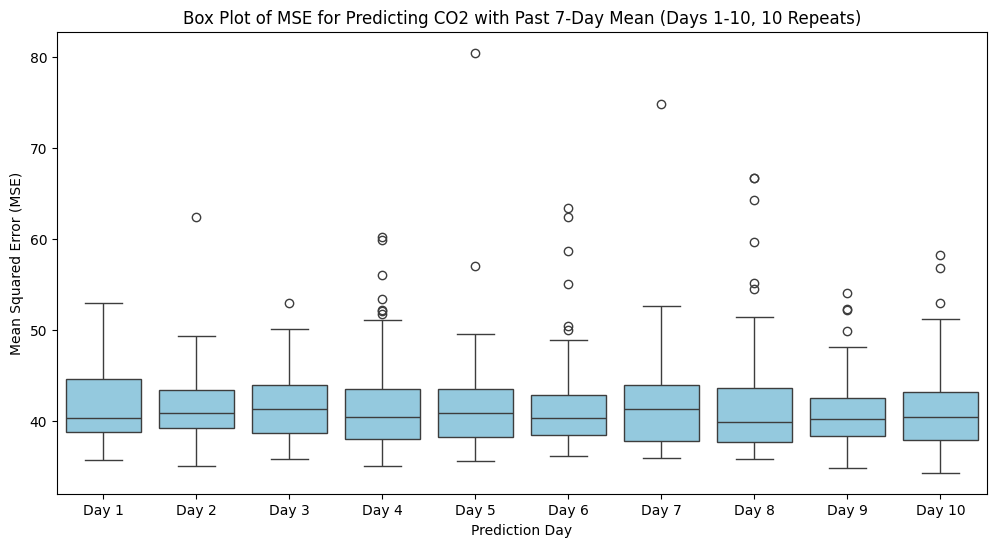

In [17]:
# Add a new feature: mean CO2 value of the past 7 days
data['CO2_mean_past_7'] = data['CO2_value'].rolling(window=7).mean()  # Mean CO2 over past 7 days

# Shift the CO2_value column by one to ten days to create the target for prediction
prediction_days_extended = list(range(1, 11))  # Predict from day 1 to day 10

# Dictionary to store results for each prediction day with repeats
day_results_with_mean = {}

# Set up cross-validation with 5 splits and 10 repeats
kf = KFold(n_splits=5, shuffle=True)  # Shuffle for diversity
mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)  # MSE scoring

# Iterate over each prediction day to build models and calculate MSE with the new feature
for prediction_day in prediction_days_extended:
    # Shift the CO2_value column to create the target for the specified prediction day
    data[f'CO2_day_{prediction_day}'] = data['CO2_value'].shift(-prediction_day)

    # Drop rows with NaN values after shifting and calculate mean for past 7 days
    data_cleaned = data.dropna(subset=[f'CO2_day_{prediction_day}', 'CO2_mean_past_7'])

    # Define features and target for the specified prediction day
    features = data_cleaned[['CH4_value', 'N2O_value', 'CO_value']]
    target = data_cleaned[f'CO2_day_{prediction_day}']

    # List to store MSE for the current prediction day with repeats
    mse_scores_list_repeats = []

    # Perform cross-validation with linear regression with 10 repeats for each prediction day
    for _ in range(repeats):  # Repeat 10 times for each model
        mse_scores = cross_val_score(linear_regression, features, target, cv=kf, scoring=mse_scorer)
        mse_scores_list_repeats.extend(-mse_scores)  # Convert to positive

    # Store MSE results for the current prediction day with repeats
    day_results_with_mean[f'Day {prediction_day}'] = mse_scores_list_repeats

# Create a DataFrame for the extended results with the new feature (10 repeats for each day)
results_df_with_mean = pd.DataFrame.from_dict(day_results_with_mean, orient='index').transpose()

# Box plot for MSE for each prediction day with 10 repeats (1 to 10) with the new feature
plt.figure(figsize=(12, 6))
sns.boxplot(data=results_df_with_mean, color="skyblue")
plt.title('Box Plot of MSE for Predicting CO2 with Past 7-Day Mean (Days 1-10, 10 Repeats)')
plt.xlabel('Prediction Day')
plt.ylabel('Mean Squared Error (MSE)')

plt.show()  # Display the box plot for MSE with the new feature (1 to 10, 10 repeats)


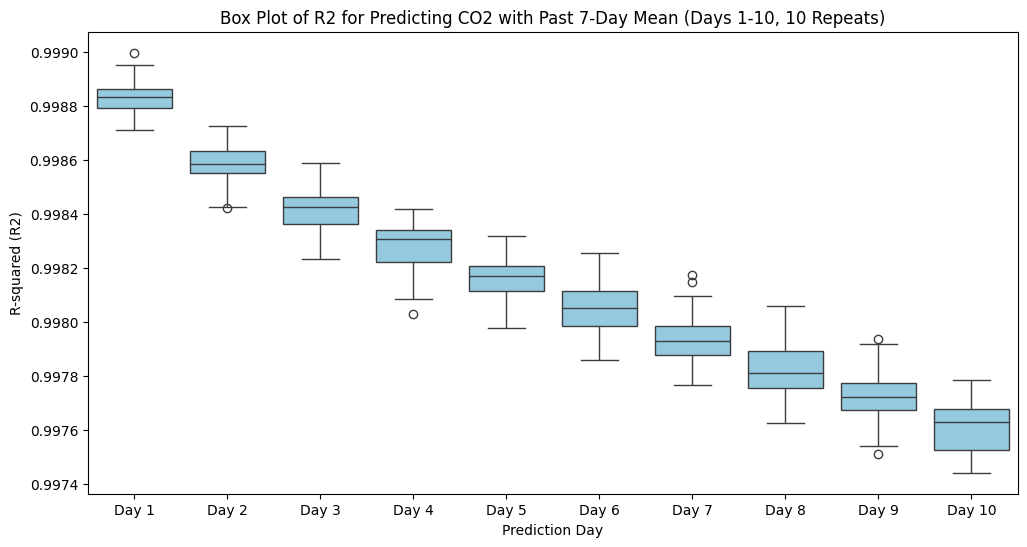

In [18]:
# Collect R2 results for each prediction day (1 to 10) with the new feature and 10 repeats
r2_day_results_with_mean = {}

# Collect R2 results for each prediction day with 10 repeats
for prediction_day in prediction_days_extended:
    # Shift the CO2_value column to create the target for the specified prediction day
    data[f'CO2_day_{prediction_day}'] = data['CO2_value'].shift(-prediction_day)

    # Drop rows with NaN values after shifting and calculate mean for past 7 days
    data_cleaned = data.dropna(subset=[f'CO2_day_{prediction_day}', 'CO2_mean_past_7'])

    # Define features and target for the specified prediction day
    features = data_cleaned[['CH4_value', 'N2O_value', 'CO_value', 'CO2_mean_past_7']]
    target = data_cleaned[f'CO2_day_{prediction_day}']

    # List to store R2 for the current prediction day with repeats
    r2_scores_list_repeats = []

    # Perform cross-validation with linear regression with 10 repeats for each prediction day
    for _ in range(repeats):  # Repeat 10 times for each model
        r2_scores = cross_val_score(linear_regression, features, target, cv=kf, scoring=r2_scorer)
        r2_scores_list_repeats.extend(r2_scores)  # Collect R2 scores

    # Store R2 results for the current prediction day with repeats
    r2_day_results_with_mean[f'Day {prediction_day}'] = r2_scores_list_repeats

# Create a DataFrame for the extended R2 results with 10 repeats for each day with the new feature
r2_results_df_with_mean = pd.DataFrame.from_dict(r2_day_results_with_mean, orient='index').transpose()

# Box plot for R2 for each prediction day with 10 repeats (1 to 10) with the new feature
plt.figure(figsize=(12, 6))
sns.boxplot(data=r2_results_df_with_mean, color="skyblue")
plt.title('Box Plot of R2 for Predicting CO2 with Past 7-Day Mean (Days 1-10, 10 Repeats)')
plt.xlabel('Prediction Day')
plt.ylabel('R-squared (R2)')

plt.show()  # Display the box plot for R2 with the new feature (1 to 10, 10 repeats)


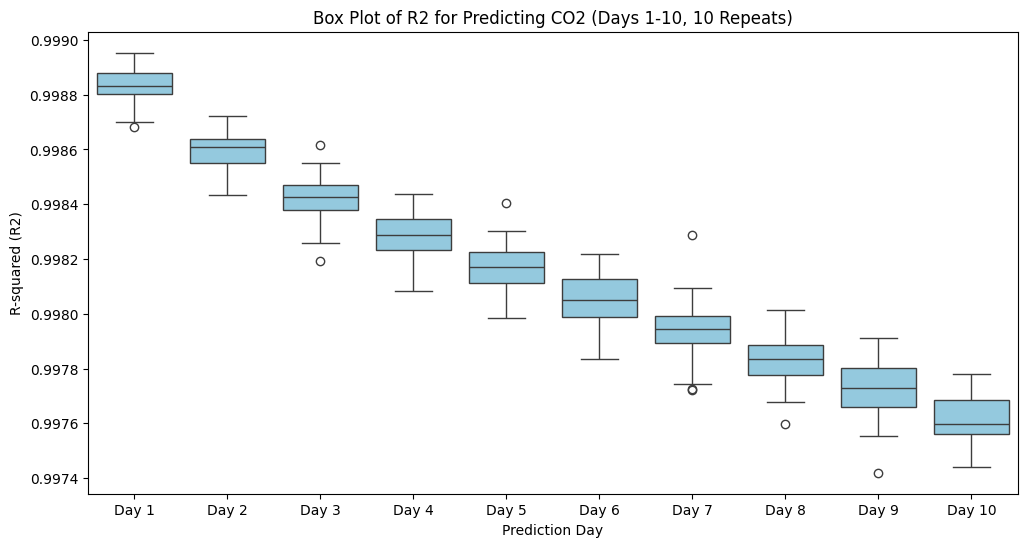

In [19]:
# Dictionary to store R2 results for each prediction day with 10 repeats with the new feature (std)
r2_day_results_with_std = {}

# Collect R2 results for each prediction day with 10 repeats with the new feature
for prediction_day in prediction_days_extended:
    # Shift the CO2_value column to create the target for the specified prediction day
    data[f'CO2_day_{prediction_day}'] = data['CO2_value'].shift(-prediction_day)
    
    data['CO2_std_past_7'] = data['CO2_value'].rolling(window=7).std()  # CO2 standard deviation over past 7 days


    # Drop rows with NaN values after shifting and calculate mean and std for past 7 days
    data_cleaned = data.dropna(subset=[f'CO2_day_{prediction_day}', 'CO2_mean_past_7', 'CO2_std_past_7'])

    # Define features and target for the specified prediction day
    features = data_cleaned[['CH4_value', 'N2O_value', 'CO_value', 'CO2_mean_past_7', 'CO2_std_past_7']]
    target = data_cleaned[f'CO2_day_{prediction_day}']

    # List to store R2 for the current prediction day with repeats
    r2_scores_list_repeats = []

    # Perform cross-validation with linear regression with 10 repeats for each prediction day
    for _ in range(repeats):  # Repeat 10 times for each model
        r2_scores = cross_val_score(linear_regression, features, target, cv=kf, scoring=r2_scorer)
        r2_scores_list_repeats.extend(r2_scores)  # Collect R2 scores

    # Store R2 results for the current prediction day with repeats
    r2_day_results_with_std[f'Day {prediction_day}'] = r2_scores_list_repeats

# Create a DataFrame for the extended R2 results with 10 repeats for each day with the new feature (std)
r2_results_df_with_std = pd.DataFrame.from_dict(r2_day_results_with_std, orient='index').transpose()

# Box plot for R2 for each prediction day with 10 repeats (1 to 10) with the new feature (std)
plt.figure(figsize=(12, 6))
sns.boxplot(data=r2_results_df_with_std, color="skyblue")
plt.title('Box Plot of R2 for Predicting CO2 (Days 1-10, 10 Repeats)')
plt.xlabel('Prediction Day')
plt.ylabel('R-squared (R2)')

plt.show()  # Display the box plot for R2 for prediction days 1-10 with the new feature (std)



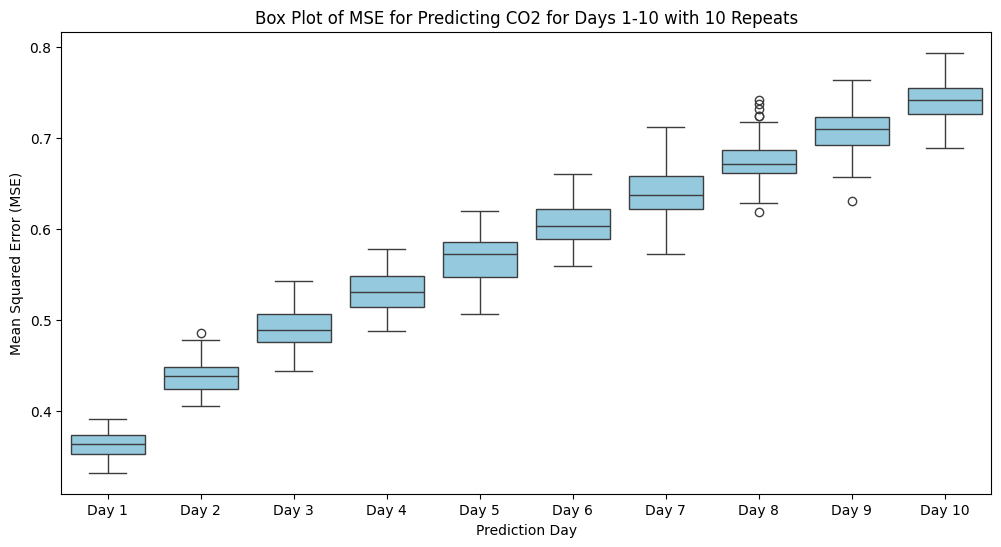

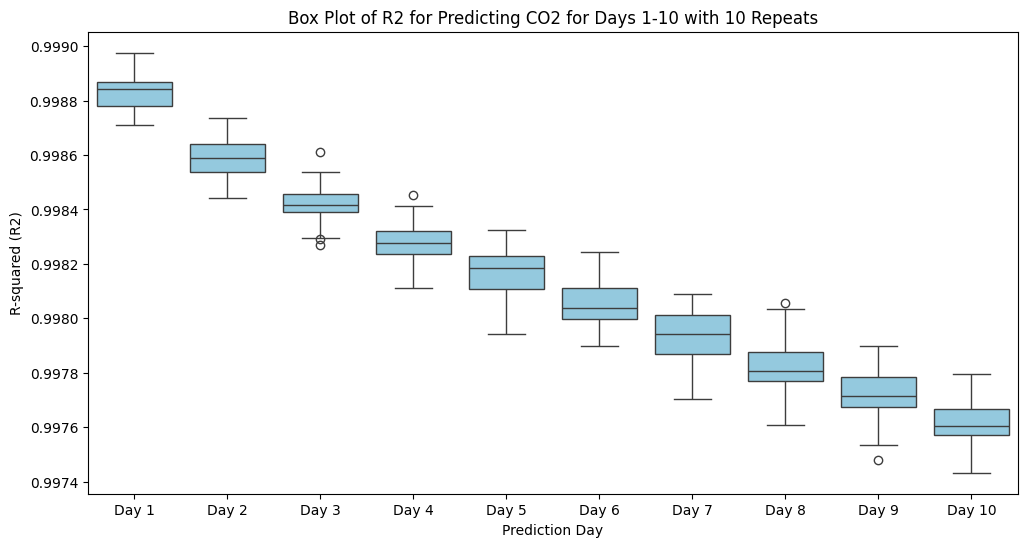

In [20]:

# Step 1: Create new variables for the past 7-day mean and std for CO2
data['CO2_mean_past_7'] = data['CO2_value'].rolling(window=7, min_periods=1).mean()  # CO2 mean over 7 days
data['CO2_std_past_7'] = data['CO2_value'].rolling(window=7, min_periods=1).std()   # CO2 std over 7 days

# Step 2: Remove NaN values to avoid errors
data = data.dropna()  # Drop rows with any NaN values

# Step 3: Set up cross-validation and features for modeling
kf = KFold(n_splits=5, shuffle=True)  # 5 splits, shuffle for diversity
linear_regression = LinearRegression()  # Use linear regression model
repeats = 10  # Number of repeats

# Step 4: Initialize dictionaries to store MSE and R2 results
mse_day_results = {}
r2_day_results = {}

# Step 5: Build models and calculate MSE and R2 for each prediction day with repeats
for prediction_day in range(1, 11):  # From day 1 to day 10
    # Shift CO2_value to create the target for the prediction day
    data[f'CO2_day_{prediction_day}'] = data['CO2_value'].shift(-prediction_day)
    
    # Drop rows with NaN values after shifting
    data_cleaned = data.dropna(subset=[f'CO2_day_{prediction_day}', 'CO2_mean_past_7', 'CO2_std_past_7'])
    
    # Define features and target for the specified prediction day
    features = data_cleaned[['CH4_value', 'N2O_value', 'CO_value', 'CO2_mean_past_7', 'CO2_std_past_7']]
    target = data_cleaned[f'CO2_day_{prediction_day}']
    
    # Step 6: Calculate MSE and R2 for each prediction day with 10 repeats
    mse_scores_list = []
    r2_scores_list = []
    
    for _ in range(repeats):
        # Cross-validation with linear regression for MSE
        mse_scores = cross_val_score(linear_regression, features, target, cv=kf, scoring='neg_mean_squared_error')
        mse_scores_list.extend(-mse_scores)  # Convert to positive
        
        # Cross-validation with linear regression for R2
        r2_scores = cross_val_score(linear_regression, features, target, cv=kf, scoring='r2')
        r2_scores_list.extend(r2_scores)
    
    # Store results
    mse_day_results[f'Day {prediction_day}'] = mse_scores_list
    r2_day_results[f'Day {prediction_day}'] = r2_scores_list
    
# Step 7: Create DataFrames for MSE and R2 results
mse_results_df = pd.DataFrame.from_dict(mse_day_results, orient='index').transpose()
r2_results_df = pd.DataFrame.from_dict(r2_day_results, orient='index').transpose()

# Step 8: Plot box plots for MSE and R2
# MSE Box Plot
plt.figure(figsize=(12, 6))
sns.boxplot(data=mse_results_df, color="skyblue")
plt.title('Box Plot of MSE for Predicting CO2 for Days 1-10 with 10 Repeats')
plt.xlabel('Prediction Day')
plt.ylabel('Mean Squared Error (MSE)')
plt.show()  # Display the MSE box plot

# R2 Box Plot
plt.figure(figsize=(12, 6))
sns.boxplot(data=r2_results_df, color="skyblue")
plt.title('Box Plot of R2 for Predicting CO2 for Days 1-10 with 10 Repeats')
plt.xlabel('Prediction Day')
plt.ylabel('R-squared (R2)')
plt.show()  # Display the R2 box plot


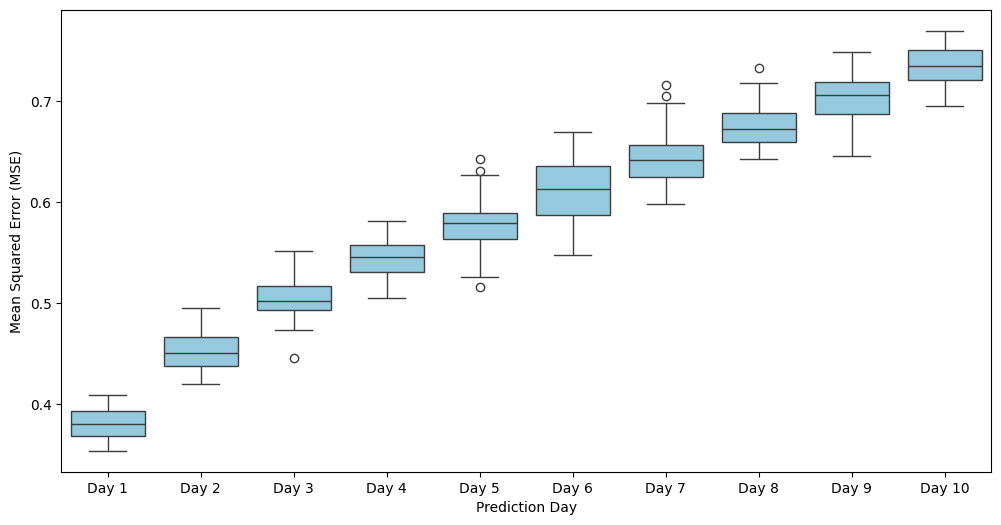

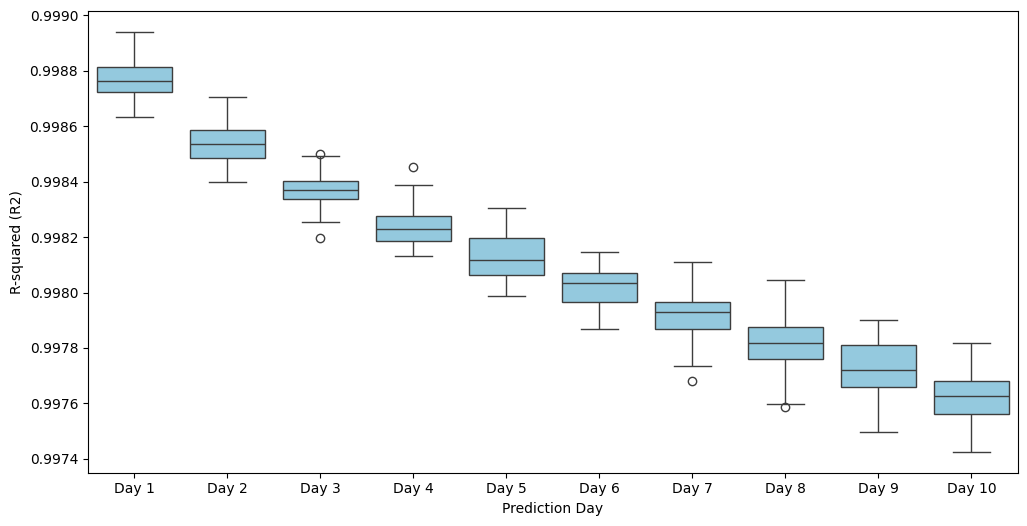

In [21]:
# Calculate past 7-day mean and std for CO, NO2, and CH4
data['CO_mean_past_7'] = data['CO_value'].rolling(window=7, min_periods=1).mean()  # CO mean over 7 days
data['CO_std_past_7'] = data['CO_value'].rolling(window=7, min_periods=1).std()   # CO std over 7 days

data['N2O_mean_past_7'] = data['N2O_value'].rolling(window=7, min_periods=1).mean()  # N2O mean over 7 days
data['N2O_std_past_7'] = data['N2O_value'].rolling(window=7, min_periods=1).std()   # N2O std over 7 days

data['CH4_mean_past_7'] = data['CH4_value'].rolling(window=7, min_periods=1).mean()  # CH4 mean over 7 days
data['CH4_std_past_7'] = data['CH4_value'].rolling(window=7, min_periods=1).std()   # CH4 std over 7 days

# Remove rows with NaN values to ensure data is clean for modeling
data = data.dropna()  # Drop rows with any NaN values

# Initialize dictionaries to store MSE and R2 results
mse_day_results = {}
r2_day_results = {}

# Build models and calculate MSE and R2 for each prediction day with repeats with new features
for prediction_day in range(1, 11):  # From day 1 to day 10
    # Shift CO2_value to create the target for the specified prediction day
    data[f'CO2_day_{prediction_day}'] = data['CO2_value'].shift(-prediction_day)
    
    # Drop rows with NaN values after shifting and ensure data is clean
    data_cleaned = data.dropna(subset=[f'CO2_day_{prediction_day}', 'CO_mean_past_7', 'CO_std_past_7', 
                                       'N2O_mean_past_7', 'N2O_std_past_7', 'CH4_mean_past_7', 'CH4_std_past_7'])
    
    # Define features and target for the specified prediction day
    features = data_cleaned[['CO_mean_past_7', 'CO_std_past_7', 'N2O_mean_past_7', 'N2O_std_past_7', 
                             'CH4_mean_past_7', 'CH4_std_past_7', 'CO2_mean_past_7', 'CO2_std_past_7']]
    target = data_cleaned[f'CO2_day_{prediction_day}']
    
    # List to store MSE and R2 for the current prediction day with repeats
    mse_scores_list = []
    r2_scores_list = []
    
    # Perform cross-validation with linear regression with 10 repeats for each prediction day
    for _ in range(repeats):  # Repeat 10 times for each model
        # Calculate MSE
        mse_scores = cross_val_score(linear_regression, features, target, cv=kf, scoring='neg_mean_squared_error')
        mse_scores_list.extend(-mse_scores)  # Convert to positive
        
        # Calculate R2
        r2_scores = cross_val_score(linear_regression, features, target, cv=kf, scoring='r2')
        r2_scores_list.extend(r2_scores)
    
    # Store MSE and R2 results for the current prediction day with repeats
    mse_day_results[f'Day {prediction_day}'] = mse_scores_list
    r2_day_results[f'Day {prediction_day}'] = r2_scores_list
    
# Create DataFrames for MSE and R2 results with 10 repeats for each day with the new features
mse_results_df = pd.DataFrame.from_dict(mse_day_results, orient='index').transpose()
r2_results_df = pd.DataFrame.from_dict(r2_day_results, orient='index').transpose()

# Plot box plots for MSE and R2
# MSE Box Plot
plt.figure(figsize=(12, 6))
sns.boxplot(data=mse_results_df, color="skyblue")
plt.xlabel('Prediction Day')
plt.ylabel('Mean Squared Error (MSE)')
plt.show()  # Display the MSE box plot with additional features

# R2 Box Plot
plt.figure(figsize=(12, 6))
sns.boxplot(data=r2_results_df, color="skyblue")
plt.xlabel('Prediction Day')
plt.ylabel('R-squared (R2)')

plt.show()  # Display the R2 box plot with additional features


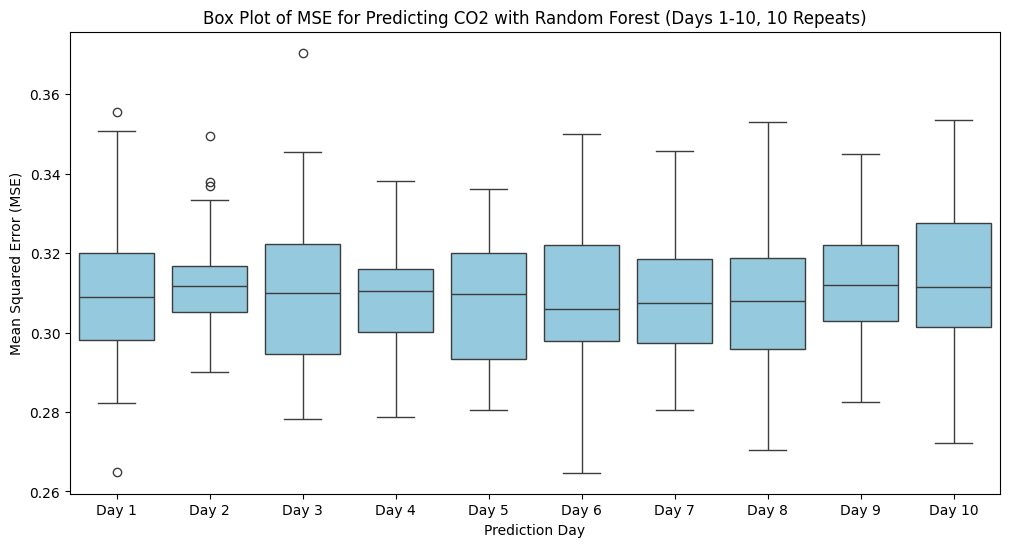

In [22]:
from sklearn.ensemble import RandomForestRegressor

# Use Random Forest instead of Linear Regression
random_forest = RandomForestRegressor(n_estimators=100, random_state=None)  # No fixed random state

# Dictionary to store MSE results for each prediction day with 10 repeats with more variables using Random Forest
mse_day_results_with_rf = {}

# Collect MSE results for each prediction day with 10 repeats using Random Forest
for prediction_day in prediction_days_extended:
    # Shift the CO2_value column to create the target for the specified prediction day
    data[f'CO2_day_{prediction_day}'] = data['CO2_value'].shift(-prediction_day)

    # Drop rows with NaN values after shifting to ensure data is clean
    data_cleaned = data.dropna(subset=[f'CO2_day_{prediction_day}', 'CO_mean_past_7', 'CO_std_past_7', 'N2O_mean_past_7', 'N2O_std_past_7', 'CH4_mean_past_7', 'CH4_std_past_7'])

    # Define features and target for the specified prediction day
    features = data_cleaned[['CH4_value', 'N2O_value', 'CO_value', 'CO2_mean_past_7', 'CO2_std_past_7', 'CO_mean_past_7', 'CO_std_past_7', 'N2O_mean_past_7', 'N2O_std_past_7', 'CH4_mean_past_7', 'CH4_std_past_7']]
    target = data_cleaned[f'CO2_day_{prediction_day}']

    # List to store MSE for the current prediction day with repeats using Random Forest
    mse_scores_list_repeats_rf = []

    # Perform cross-validation with Random Forest with 10 repeats for each prediction day
    for _ in range(repeats):  # Repeat 10 times for each model
        mse_scores = cross_val_score(random_forest, features, target, cv=kf, scoring='neg_mean_squared_error')
        mse_scores_list_repeats_rf.extend(-mse_scores)  # Convert to positive

    # Store MSE results for the current prediction day with repeats using Random Forest
    mse_day_results_with_rf[f'Day {prediction_day}'] = mse_scores_list_repeats_rf

# Create a DataFrame for the extended MSE results with 10 repeats for each day using Random Forest
mse_results_df_with_rf = pd.DataFrame.from_dict(mse_day_results_with_rf, orient='index').transpose()

# Box plot for MSE for each prediction day with 10 repeats (1 to 10) using Random Forest
plt.figure(figsize=(12, 6))
sns.boxplot(data=mse_results_df_with_rf, color="skyblue")
plt.title('Box Plot of MSE for Predicting CO2 with Random Forest (Days 1-10, 10 Repeats)')
plt.xlabel('Prediction Day')
plt.ylabel('Mean Squared Error (MSE)')

plt.show()  # Display the box plot for MSE with Random Forest for prediction days 1-10 (10 repeats)


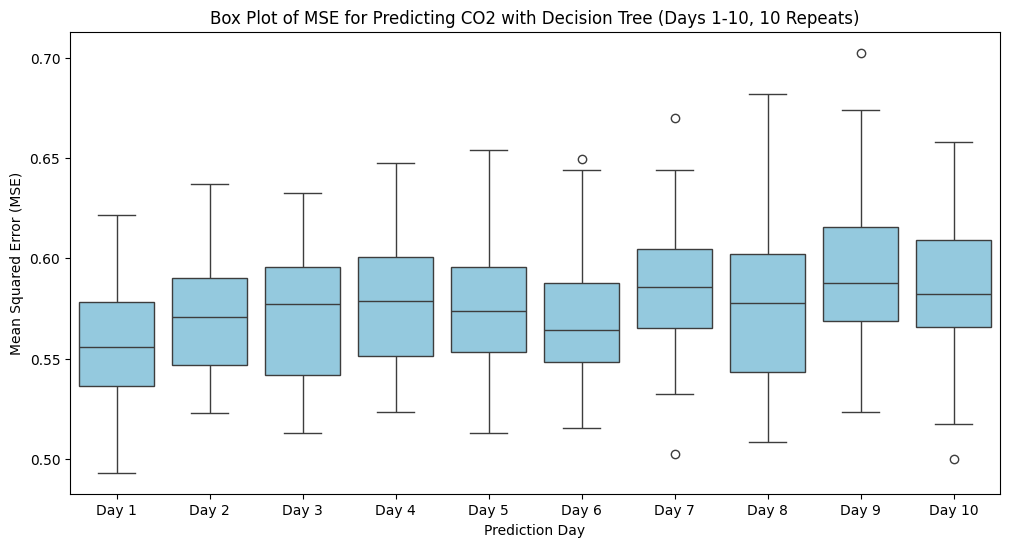

In [23]:
from sklearn.tree import DecisionTreeRegressor

# Recreate the Decision Tree model
decision_tree = DecisionTreeRegressor()  # No fixed random state

# Re-create the dictionary to store MSE results for each prediction day with 10 repeats using Decision Tree
mse_day_results_with_dt = {}

# Collect MSE results for each prediction day with 10 repeats using Decision Tree
for prediction_day in prediction_days_extended:
    # Shift the CO2_value column to create the target for the specified prediction day
    data[f'CO2_day_{prediction_day}'] = data['CO2_value'].shift(-prediction_day)

    # Drop rows with NaN values after shifting to ensure data is clean
    data_cleaned = data.dropna(subset=[f'CO2_day_{prediction_day}', 'CO_mean_past_7', 'CO_std_past_7', 'N2O_mean_past_7', 'N2O_std_past_7', 'CH4_mean_past_7', 'CH4_std_past_7'])

    # Define features and target for the specified prediction day
    features = data_cleaned[['CH4_value', 'N2O_value', 'CO_value', 'CO2_mean_past_7', 'CO2_std_past_7', 'CO_mean_past_7', 'CO_std_past_7', 'N2O_mean_past_7', 'N2O_std_past_7', 'CH4_mean_past_7', 'CH4_std_past_7']]
    target = data_cleaned[f'CO2_day_{prediction_day}']

    # List to store MSE for the current prediction day with repeats using Decision Tree
    mse_scores_list_repeats_dt = []

    # Perform cross-validation with Decision Tree with 10 repeats for each prediction day
    for _ in range(repeats):  # Repeat 10 times for each model
        mse_scores = cross_val_score(decision_tree, features, target, cv=kf, scoring='neg_mean_squared_error')
        mse_scores_list_repeats_dt.extend(-mse_scores)  # Convert to positive

    # Store MSE results for the current prediction day with repeats using Decision Tree
    mse_day_results_with_dt[f'Day {prediction_day}'] = mse_scores_list_repeats_dt

# Create a DataFrame for the extended MSE results with 10 repeats for each day using Decision Tree
mse_results_df_with_dt = pd.DataFrame.from_dict(mse_day_results_with_dt, orient='index').transpose()

# Box plot for MSE for each prediction day with 10 repeats (1 to 10) using Decision Tree
plt.figure(figsize=(12, 6))
sns.boxplot(data=mse_results_df_with_dt, color="skyblue")
plt.title('Box Plot of MSE for Predicting CO2 with Decision Tree (Days 1-10, 10 Repeats)')
plt.xlabel('Prediction Day')
plt.ylabel('Mean Squared Error (MSE)')

plt.show()  # Display the box plot for MSE with Decision Tree for prediction days 1-10 (10 repeats)


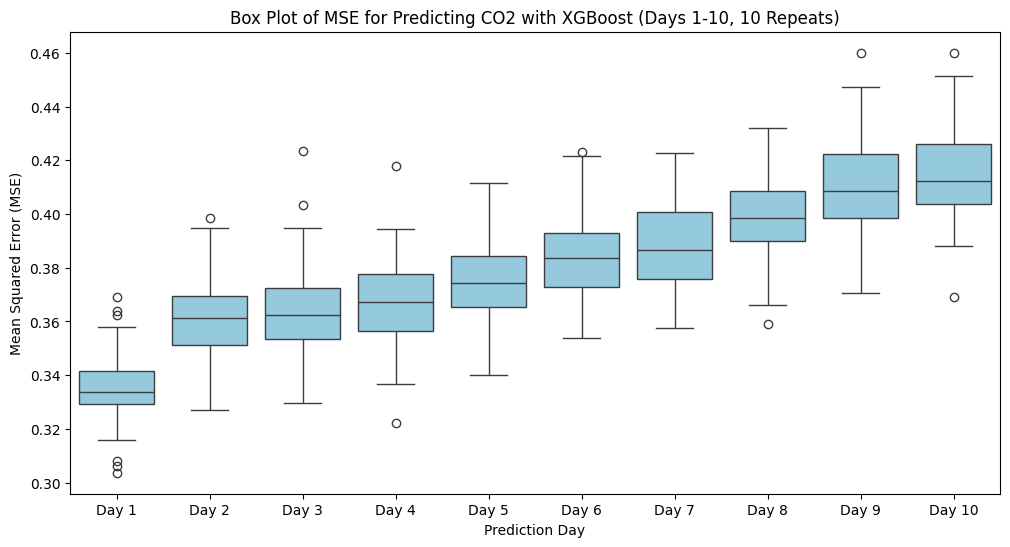

In [24]:
from xgboost import XGBRegressor

# Use XGBoost model
xgboost_regressor = XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=None)  # XGBoost regressor

# Dictionary to store MSE results for each prediction day with 10 repeats using XGBoost
mse_day_results_with_xgb = {}

# Collect MSE results for each prediction day with 10 repeats using XGBoost
for prediction_day in prediction_days_extended:
    # Shift the CO2_value column to create the target for the specified prediction day
    data[f'CO2_day_{prediction_day}'] = data['CO2_value'].shift(-prediction_day)

    # Drop rows with NaN values after shifting to ensure data is clean
    data_cleaned = data.dropna(subset=[f'CO2_day_{prediction_day}', 'CO_mean_past_7', 'CO_std_past_7', 'N2O_mean_past_7', 'N2O_std_past_7', 'CH4_mean_past_7', 'CH4_std_past_7'])

    # Define features and target for the specified prediction day
    features = data_cleaned[['CH4_value', 'N2O_value', 'CO_value', 'CO2_mean_past_7', 'CO2_std_past_7', 'CO_mean_past_7', 'CO_std_past_7', 'N2O_mean_past_7', 'N2O_std_past_7', 'CH4_mean_past_7', 'CH4_std_past_7']]
    target = data_cleaned[f'CO2_day_{prediction_day}']

    # List to store MSE for the current prediction day with repeats using XGBoost
    mse_scores_list_repeats_xgb = []

    # Perform cross-validation with XGBoost with 10 repeats for each prediction day
    for _ in range(repeats):  # Repeat 10 times for each model
        mse_scores = cross_val_score(xgboost_regressor, features, target, cv=kf, scoring='neg_mean_squared_error')
        mse_scores_list_repeats_xgb.extend(-mse_scores)  # Convert to positive

    # Store MSE results for the current prediction day with repeats using XGBoost
    mse_day_results_with_xgb[f'Day {prediction_day}'] = mse_scores_list_repeats_xgb

# Create a DataFrame for the extended MSE results with 10 repeats for each day using XGBoost
mse_results_df_with_xgb = pd.DataFrame.from_dict(mse_day_results_with_xgb, orient='index').transpose()

# Box plot for MSE for each prediction day with 10 repeats (1 to 10) using XGBoost
plt.figure(figsize=(12, 6))
sns.boxplot(data=mse_results_df_with_xgb, color="skyblue")
plt.title('Box Plot of MSE for Predicting CO2 with XGBoost (Days 1-10, 10 Repeats)')
plt.xlabel('Prediction Day')
plt.ylabel('Mean Squared Error (MSE)')

plt.show()  # Display the box plot for MSE with XGBoost for prediction days 1-10 (10 repeats)


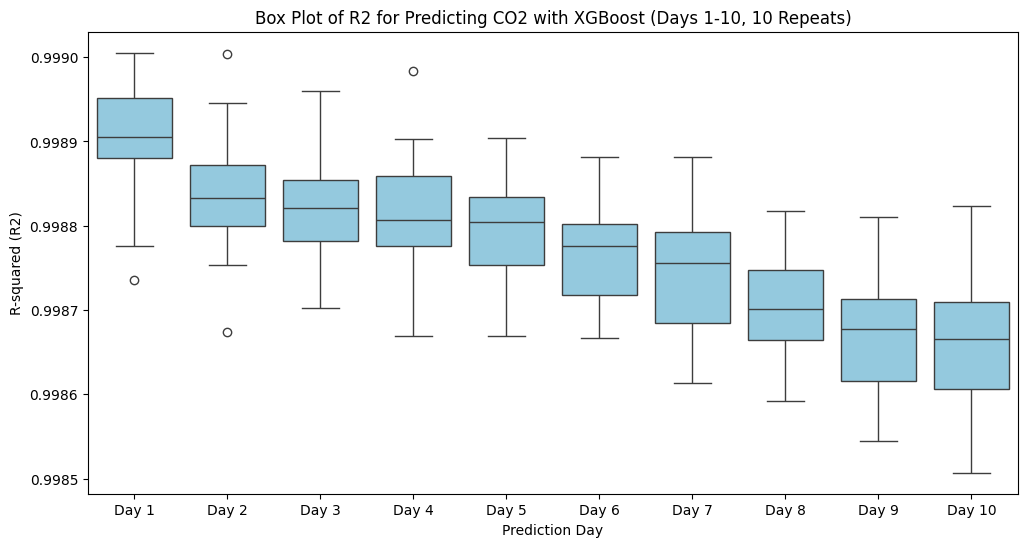

In [25]:
# Dictionary to store R2 results for each prediction day with 10 repeats using XGBoost
r2_day_results_with_xgb = {}

# Collect R2 results for each prediction day with 10 repeats using XGBoost
for prediction_day in prediction_days_extended:
    # Shift the CO2_value column to create the target for the specified prediction day
    data[f'CO2_day_{prediction_day}'] = data['CO2_value'].shift(-prediction_day)

    # Drop rows with NaN values after shifting to ensure data is clean
    data_cleaned = data.dropna(subset=[f'CO2_day_{prediction_day}', 'CO_mean_past_7', 'CO_std_past_7', 'N2O_mean_past_7', 'N2O_std_past_7', 'CH4_mean_past_7', 'CH4_std_past_7'])

    # Define features and target for the specified prediction day
    features = data_cleaned[['CH4_value', 'N2O_value', 'CO_value', 'CO2_mean_past_7', 'CO2_std_past_7', 'CO_mean_past_7', 'CO_std_past_7', 'N2O_mean_past_7', 'N2O_std_past_7', 'CH4_mean_past_7', 'CH4_std_past_7']]
    target = data_cleaned[f'CO2_day_{prediction_day}']

    # List to store R2 for the current prediction day with repeats using XGBoost
    r2_scores_list_repeats_xgb = []

    # Perform cross-validation with XGBoost with 10 repeats for each prediction day
    for _ in range(repeats):  # Repeat 10 times for each model
        r2_scores = cross_val_score(xgboost_regressor, features, target, cv=kf, scoring='r2')
        r2_scores_list_repeats_xgb.extend(r2_scores)  # Collect R2 scores

    # Store R2 results for the current prediction day with repeats using XGBoost
    r2_day_results_with_xgb[f'Day {prediction_day}'] = r2_scores_list_repeats_xgb

# Create a DataFrame for the extended R2 results with 10 repeats for each day using XGBoost
r2_results_df_with_xgb = pd.DataFrame.from_dict(r2_day_results_with_xgb, orient='index').transpose()

# Box plot for R2 for each prediction day with 10 repeats (1 to 10) using XGBoost
plt.figure(figsize=(12, 6))
sns.boxplot(data=r2_results_df_with_xgb, color="skyblue")
plt.title('Box Plot of R2 for Predicting CO2 with XGBoost (Days 1-10, 10 Repeats)')
plt.xlabel('Prediction Day')
plt.ylabel('R-squared (R2)')

plt.show()  # Display the box plot for R2 with XGBoost for prediction days 1-10 (10 repeats)


Mean Squared Error (MSE) for each prediction day:
index
Day 1     0.329445
Day 10    0.434175
Day 2     0.350672
Day 3     0.332339
Day 4     0.348620
Day 5     0.401673
Day 6     0.357409
Day 7     0.392521
Day 8     0.403909
Day 9     0.418121
dtype: float64


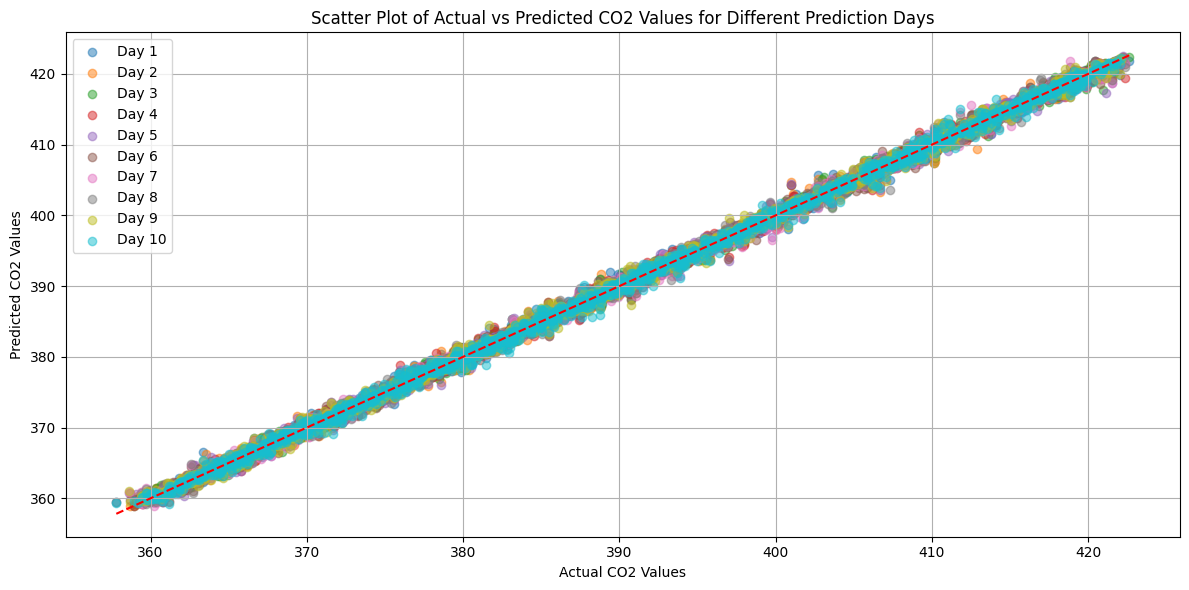

Instances with significant prediction errors:
        index Predictions Actuals
45      Day 1  395.944824  397.64
62      Day 1  417.423737  418.98
186     Day 1   385.31781  383.11
208     Day 1  419.902496  422.07
250     Day 1  389.016083  390.65
...       ...         ...     ...
20174  Day 10  369.236786  367.61
20176  Day 10  393.175568  391.54
20241  Day 10  414.622253  412.94
20257  Day 10  393.517883  395.83
20395  Day 10  365.453308  363.36

[595 rows x 3 columns]


In [26]:
from sklearn.metrics import mean_squared_error

# 字典存储每个预测天数的预测值和实际值
predictions_vs_actuals = {}

# Collect predictions and actuals for each prediction day with XGBoost
for prediction_day in prediction_days_extended:
    # Shift the CO2_value column to create the target for the specified prediction day
    data[f'CO2_day_{prediction_day}'] = data['CO2_value'].shift(-prediction_day)

    # Drop rows with NaN values after shifting to ensure data is clean
    data_cleaned = data.dropna(subset=[f'CO2_day_{prediction_day}', 'CO_mean_past_7', 'CO_std_past_7', 'N2O_mean_past_7', 'N2O_std_past_7', 'CH4_mean_past_7', 'CH4_std_past_7'])

    # Define features and target for the specified prediction day
    features = data_cleaned[['CH4_value', 'N2O_value', 'CO_value', 'CO2_mean_past_7', 'CO2_std_past_7', 'CO_mean_past_7', 'CO_std_past_7', 'N2O_mean_past_7', 'N2O_std_past_7', 'CH4_mean_past_7', 'CH4_std_past_7']]
    target = data_cleaned[f'CO2_day_{prediction_day}']

    # List to store predictions and actual values for the current prediction day
    predictions_list = []
    actuals_list = []

    # Perform train-test split
    X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

    # Train the XGBoost model
    xgboost_regressor.fit(X_train, y_train)

    # Predict on the test set
    y_pred = xgboost_regressor.predict(X_test)

    # Collect predictions and actual values
    predictions_list.extend(y_pred)
    actuals_list.extend(y_test)

    # Store predictions and actual values for the current prediction day
    predictions_vs_actuals[f'Day {prediction_day}'] = {'Predictions': predictions_list, 'Actuals': actuals_list}

# Convert the predictions vs actuals dictionary to a DataFrame for easier analysis
predictions_vs_actuals_df = pd.DataFrame.from_dict(predictions_vs_actuals, orient='index').apply(pd.Series.explode).reset_index()

# 计算并显示均方误差（MSE）
mse_values = predictions_vs_actuals_df.groupby('index').apply(lambda x: mean_squared_error(x['Actuals'], x['Predictions']))
print("Mean Squared Error (MSE) for each prediction day:")
print(mse_values)

# 绘制实际值与预测值的散点图
plt.figure(figsize=(12, 6))
for prediction_day in prediction_days_extended:
    plt.scatter(predictions_vs_actuals[f'Day {prediction_day}']['Actuals'], predictions_vs_actuals[f'Day {prediction_day}']['Predictions'], alpha=0.5, label=f'Day {prediction_day}')

plt.plot([min(predictions_vs_actuals_df['Actuals']), max(predictions_vs_actuals_df['Actuals'])], 
         [min(predictions_vs_actuals_df['Actuals']), max(predictions_vs_actuals_df['Actuals'])], 
         color='red', linestyle='--')  # 参考线 y=x
plt.xlabel('Actual CO2 Values')
plt.ylabel('Predicted CO2 Values')
plt.title('Scatter Plot of Actual vs Predicted CO2 Values for Different Prediction Days')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# 识别显著偏离的实例
threshold = 1.5  # 设置显著偏离的阈值，可以根据具体情况调整
significant_errors = predictions_vs_actuals_df[np.abs(predictions_vs_actuals_df['Predictions'] - predictions_vs_actuals_df['Actuals']) > threshold]

print("Instances with significant prediction errors:")
print(significant_errors)


Mean Squared Error (MSE) for each prediction day:
index
Day 1     0.329445
Day 10    0.434175
Day 2     0.350672
Day 3     0.332339
Day 4     0.348620
Day 5     0.401673
Day 6     0.357409
Day 7     0.392521
Day 8     0.403909
Day 9     0.418121
dtype: float64

Root Mean Squared Error (RMSE) for each prediction day:
index
Day 1     0.573973
Day 10    0.658920
Day 2     0.592175
Day 3     0.576488
Day 4     0.590441
Day 5     0.633777
Day 6     0.597837
Day 7     0.626515
Day 8     0.635538
Day 9     0.646623
dtype: float64

Mean Absolute Error (MAE) for each prediction day:
index
Day 1     0.416018
Day 10    0.485210
Day 2     0.429748
Day 3     0.425409
Day 4     0.430006
Day 5     0.468093
Day 6     0.446123
Day 7     0.459756
Day 8     0.474872
Day 9     0.481702
dtype: float64


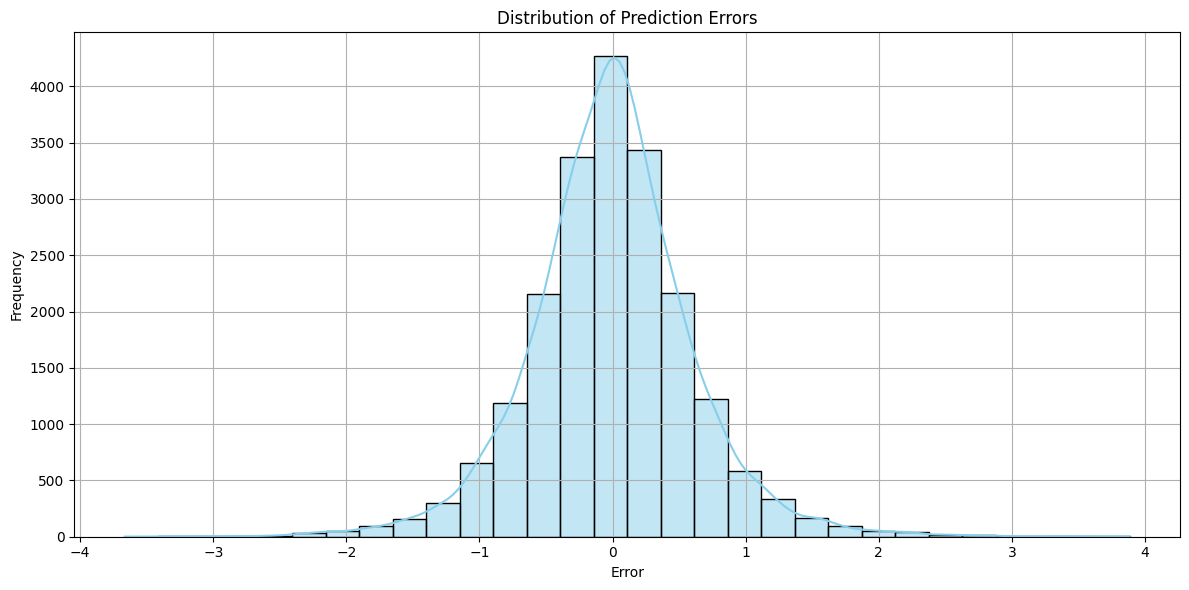

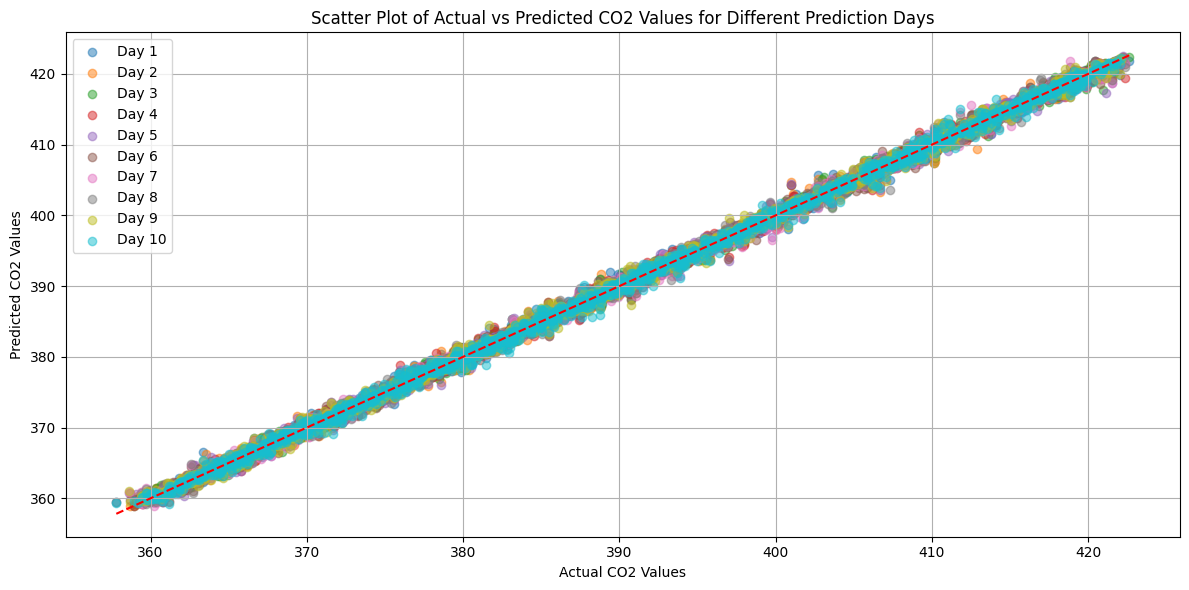

Instances with significant prediction errors:
        index Predictions Actuals
45      Day 1  395.944824  397.64
62      Day 1  417.423737  418.98
186     Day 1   385.31781  383.11
208     Day 1  419.902496  422.07
250     Day 1  389.016083  390.65
...       ...         ...     ...
20174  Day 10  369.236786  367.61
20176  Day 10  393.175568  391.54
20241  Day 10  414.622253  412.94
20257  Day 10  393.517883  395.83
20395  Day 10  365.453308  363.36

[595 rows x 3 columns]


In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
import xgboost as xgb

# 假设我们已有数据集 data 和 XGBoost 模型 xgboost_regressor
# 预测天数
prediction_days_extended = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
repeats = 10

# 字典存储每个预测天数的预测值和实际值
predictions_vs_actuals = {}

# Collect predictions and actuals for each prediction day with XGBoost
for prediction_day in prediction_days_extended:
    # Shift the CO2_value column to create the target for the specified prediction day
    data[f'CO2_day_{prediction_day}'] = data['CO2_value'].shift(-prediction_day)

    # Drop rows with NaN values after shifting to ensure data is clean
    data_cleaned = data.dropna(subset=[f'CO2_day_{prediction_day}', 'CO_mean_past_7', 'CO_std_past_7', 'N2O_mean_past_7', 'N2O_std_past_7', 'CH4_mean_past_7', 'CH4_std_past_7'])

    # Define features and target for the specified prediction day
    features = data_cleaned[['CH4_value', 'N2O_value', 'CO_value', 'CO2_mean_past_7', 'CO2_std_past_7', 'CO_mean_past_7', 'CO_std_past_7', 'N2O_mean_past_7', 'N2O_std_past_7', 'CH4_mean_past_7', 'CH4_std_past_7']]
    target = data_cleaned[f'CO2_day_{prediction_day}']

    # List to store predictions and actual values for the current prediction day
    predictions_list = []
    actuals_list = []

    # Perform train-test split
    X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

    # Train the XGBoost model
    xgboost_regressor = xgb.XGBRegressor()
    xgboost_regressor.fit(X_train, y_train)

    # Predict on the test set
    y_pred = xgboost_regressor.predict(X_test)

    # Collect predictions and actual values
    predictions_list.extend(y_pred)
    actuals_list.extend(y_test)

    # Store predictions and actual values for the current prediction day
    predictions_vs_actuals[f'Day {prediction_day}'] = {'Predictions': predictions_list, 'Actuals': actuals_list}

# Convert the predictions vs actuals dictionary to a DataFrame for easier analysis
predictions_vs_actuals_df = pd.DataFrame.from_dict(predictions_vs_actuals, orient='index').apply(pd.Series.explode).reset_index()

# 计算误差指标
mse_values = predictions_vs_actuals_df.groupby('index').apply(lambda x: mean_squared_error(x['Actuals'], x['Predictions']))
rmse_values = np.sqrt(mse_values)
mae_values = predictions_vs_actuals_df.groupby('index').apply(lambda x: mean_absolute_error(x['Actuals'], x['Predictions']))

print("Mean Squared Error (MSE) for each prediction day:")
print(mse_values)
print("\nRoot Mean Squared Error (RMSE) for each prediction day:")
print(rmse_values)
print("\nMean Absolute Error (MAE) for each prediction day:")
print(mae_values)

# 绘制误差分布图
plt.figure(figsize=(12, 6))
sns.histplot(predictions_vs_actuals_df['Actuals'] - predictions_vs_actuals_df['Predictions'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Prediction Errors')
plt.xlabel('Error')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()

# 绘制实际值与预测值的散点图
plt.figure(figsize=(12, 6))
for prediction_day in prediction_days_extended:
    plt.scatter(predictions_vs_actuals[f'Day {prediction_day}']['Actuals'], predictions_vs_actuals[f'Day {prediction_day}']['Predictions'], alpha=0.5, label=f'Day {prediction_day}')

plt.plot([min(predictions_vs_actuals_df['Actuals']), max(predictions_vs_actuals_df['Actuals'])], 
         [min(predictions_vs_actuals_df['Actuals']), max(predictions_vs_actuals_df['Actuals'])], 
         color='red', linestyle='--')  # 参考线 y=x
plt.xlabel('Actual CO2 Values')
plt.ylabel('Predicted CO2 Values')
plt.title('Scatter Plot of Actual vs Predicted CO2 Values for Different Prediction Days')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# 识别显著偏离的实例
threshold = 1.5  # 设置显著偏离的阈值，可以根据具体情况调整
significant_errors = predictions_vs_actuals_df[np.abs(predictions_vs_actuals_df['Predictions'] - predictions_vs_actuals_df['Actuals']) > threshold]

print("Instances with significant prediction errors:")
print(significant_errors)


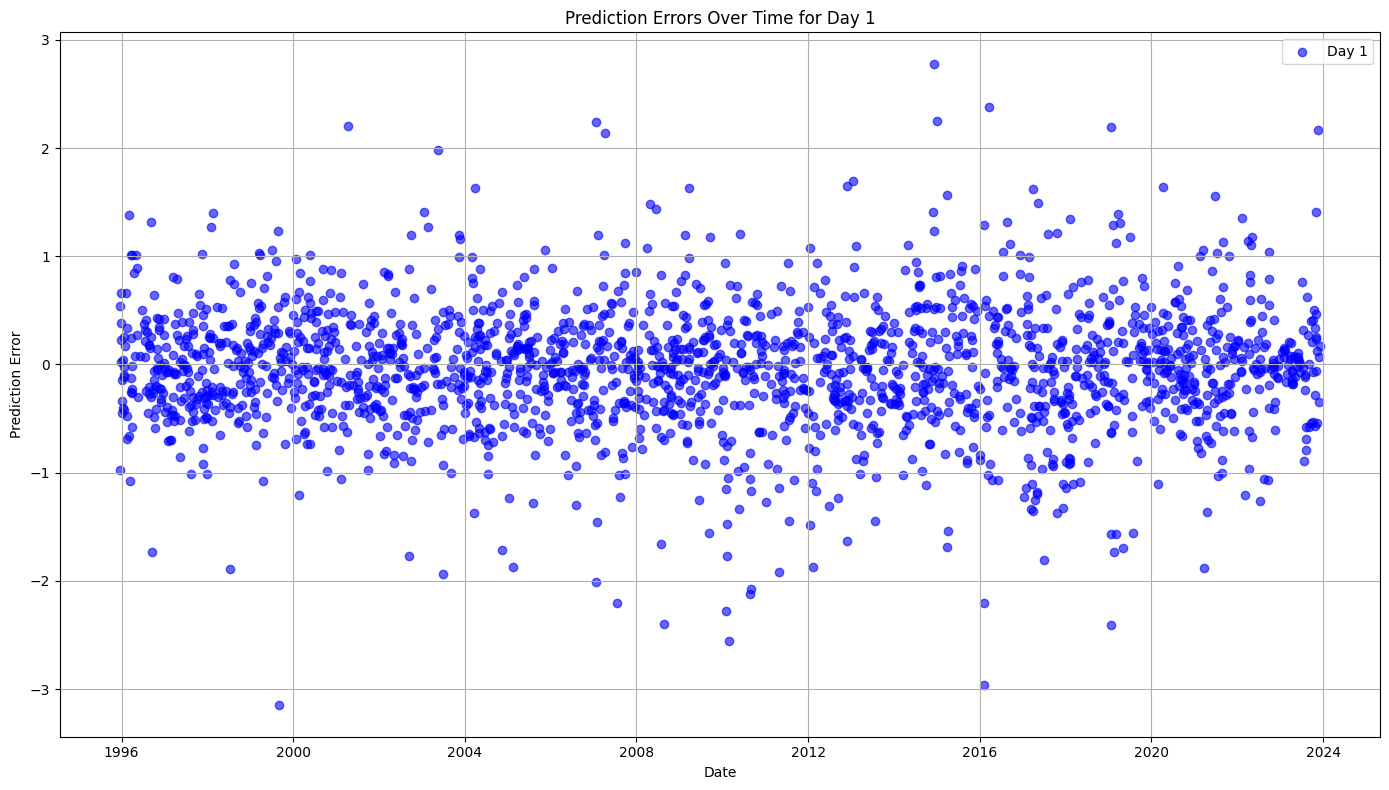

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
import xgboost as xgb

# 假设我们已有数据集 data 和 XGBoost 模型 xgboost_regressor
# 预测天数
prediction_days_extended = [1]
repeats = 10

# 将年、月、日合并成日期列
data['date'] = pd.to_datetime(data[['year', 'month', 'day']])

# 字典存储每个预测天数的预测值和实际值
predictions_vs_actuals = {}

# Collect predictions and actuals for Day 1 with XGBoost
for prediction_day in prediction_days_extended:
    # Shift the CO2_value column to create the target for the specified prediction day
    data[f'CO2_day_{prediction_day}'] = data['CO2_value'].shift(-prediction_day)

    # Drop rows with NaN values after shifting to ensure data is clean
    data_cleaned = data.dropna(subset=[f'CO2_day_{prediction_day}', 'CO_mean_past_7', 'CO_std_past_7', 'N2O_mean_past_7', 'N2O_std_past_7', 'CH4_mean_past_7', 'CH4_std_past_7', 'date'])

    # Define features and target for the specified prediction day
    features = data_cleaned[['CH4_value', 'N2O_value', 'CO_value', 'CO2_mean_past_7', 'CO2_std_past_7', 'CO_mean_past_7', 'CO_std_past_7', 'N2O_mean_past_7', 'N2O_std_past_7', 'CH4_mean_past_7', 'CH4_std_past_7']]
    target = data_cleaned[f'CO2_day_{prediction_day}']

    # List to store predictions and actual values for the current prediction day
    predictions_list = []
    actuals_list = []
    dates_list = []  # 新增列表用于存储日期

    # Perform train-test split
    X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

    # Train the XGBoost model
    xgboost_regressor = xgb.XGBRegressor()
    xgboost_regressor.fit(X_train, y_train)

    # Predict on the test set
    y_pred = xgboost_regressor.predict(X_test)

    # Collect predictions, actual values, and corresponding dates
    predictions_list.extend(y_pred)
    actuals_list.extend(y_test)
    dates_list.extend(data_cleaned.loc[y_test.index, 'date'])  # 获取对应的日期

    # Store predictions, actual values, and dates for the current prediction day
    predictions_vs_actuals[f'Day {prediction_day}'] = {'Predictions': predictions_list, 'Actuals': actuals_list, 'Dates': dates_list}

# Convert the predictions vs actuals dictionary to a DataFrame for easier analysis
predictions_vs_actuals_df = pd.DataFrame.from_dict(predictions_vs_actuals, orient='index').apply(pd.Series.explode).reset_index()

# 计算误差
predictions_vs_actuals_df['Error'] = predictions_vs_actuals_df['Actuals'] - predictions_vs_actuals_df['Predictions']

# 绘制随时间变化的误差散点图，仅绘制 Day 1
plt.figure(figsize=(14, 8))
day_data = predictions_vs_actuals_df[predictions_vs_actuals_df['index'] == 'Day 1']
plt.scatter(day_data['Dates'], day_data['Error'], label='Day 1', color='blue', alpha=0.6)

plt.xlabel('Date')
plt.ylabel('Prediction Error')
plt.title('Prediction Errors Over Time for Day 1')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


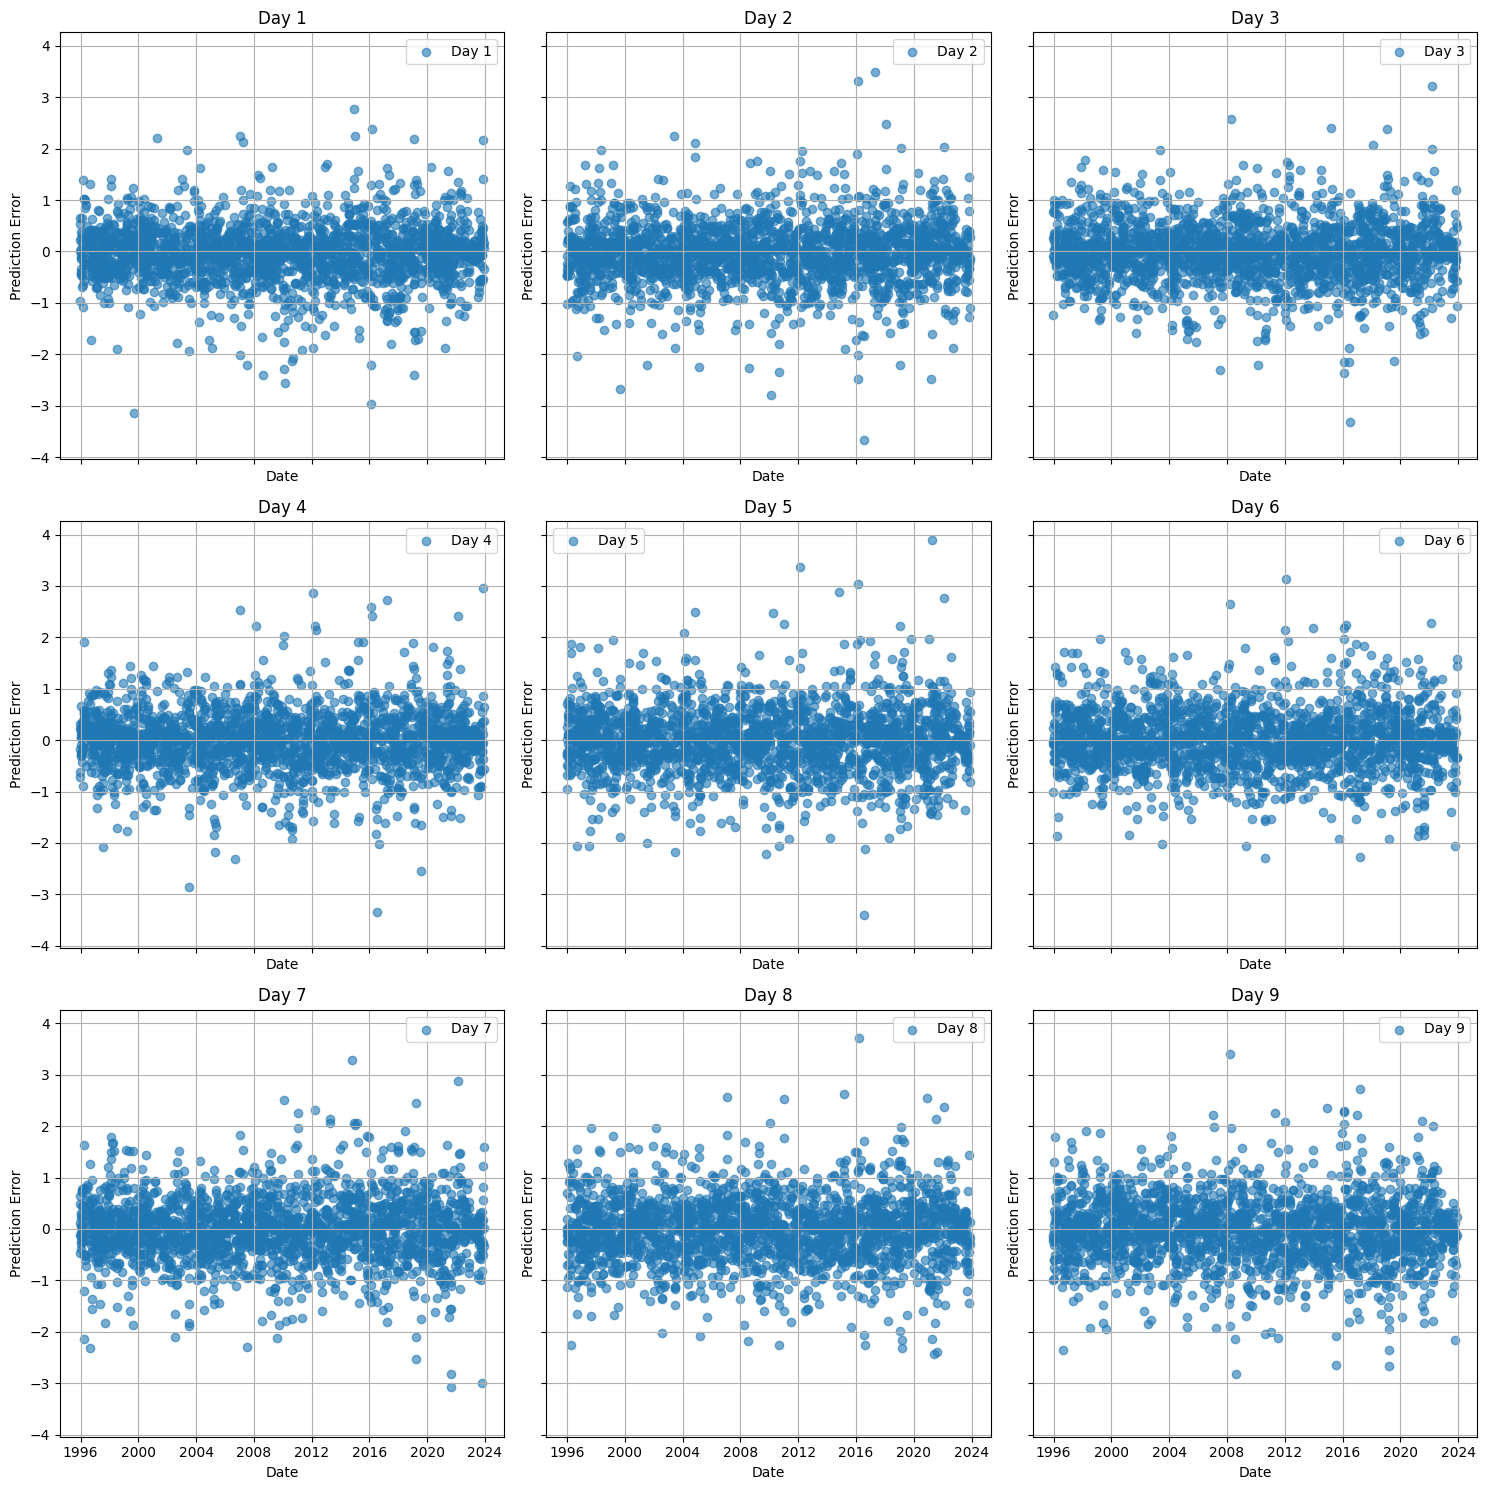

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
import xgboost as xgb

# 假设我们已有数据集 data 和 XGBoost 模型 xgboost_regressor
# 预测天数
prediction_days_extended = [1, 2, 3, 4, 5, 6, 7, 8, 9]
repeats = 10

# 将年、月、日合并成日期列
data['date'] = pd.to_datetime(data[['year', 'month', 'day']])

# 字典存储每个预测天数的预测值和实际值
predictions_vs_actuals = {}

# Collect predictions and actuals for each prediction day with XGBoost
for prediction_day in prediction_days_extended:
    # Shift the CO2_value column to create the target for the specified prediction day
    data[f'CO2_day_{prediction_day}'] = data['CO2_value'].shift(-prediction_day)

    # Drop rows with NaN values after shifting to ensure data is clean
    data_cleaned = data.dropna(subset=[f'CO2_day_{prediction_day}', 'CO_mean_past_7', 'CO_std_past_7', 'N2O_mean_past_7', 'N2O_std_past_7', 'CH4_mean_past_7', 'CH4_std_past_7', 'date'])

    # Define features and target for the specified prediction day
    features = data_cleaned[['CH4_value', 'N2O_value', 'CO_value', 'CO2_mean_past_7', 'CO2_std_past_7', 'CO_mean_past_7', 'CO_std_past_7', 'N2O_mean_past_7', 'N2O_std_past_7', 'CH4_mean_past_7', 'CH4_std_past_7']]
    target = data_cleaned[f'CO2_day_{prediction_day}']

    # List to store predictions and actual values for the current prediction day
    predictions_list = []
    actuals_list = []
    dates_list = []  # 新增列表用于存储日期

    # Perform train-test split
    X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

    # Train the XGBoost model
    xgboost_regressor = xgb.XGBRegressor()
    xgboost_regressor.fit(X_train, y_train)

    # Predict on the test set
    y_pred = xgboost_regressor.predict(X_test)

    # Collect predictions, actual values, and corresponding dates
    predictions_list.extend(y_pred)
    actuals_list.extend(y_test)
    dates_list.extend(data_cleaned.loc[y_test.index, 'date'])  # 获取对应的日期

    # Store predictions, actual values, and dates for the current prediction day
    predictions_vs_actuals[f'Day {prediction_day}'] = {'Predictions': predictions_list, 'Actuals': actuals_list, 'Dates': dates_list}

# Convert the predictions vs actuals dictionary to a DataFrame for easier analysis
predictions_vs_actuals_df = pd.DataFrame.from_dict(predictions_vs_actuals, orient='index').apply(pd.Series.explode).reset_index()

# 计算误差
predictions_vs_actuals_df['Error'] = predictions_vs_actuals_df['Actuals'] - predictions_vs_actuals_df['Predictions']

# 绘制3×3网格图，每个子图表示一天的预测误差
fig, axes = plt.subplots(3, 3, figsize=(15, 15), sharex=True, sharey=True)
axes = axes.flatten()

for i, prediction_day in enumerate(prediction_days_extended):
    day_data = predictions_vs_actuals_df[predictions_vs_actuals_df['index'] == f'Day {prediction_day}']
    axes[i].scatter(day_data['Dates'], day_data['Error'], label=f'Day {prediction_day}', alpha=0.6)
    axes[i].set_title(f'Day {prediction_day}')
    axes[i].set_xlabel('Date')
    axes[i].set_ylabel('Prediction Error')
    axes[i].legend()
    axes[i].grid(True)

plt.tight_layout()
plt.show()


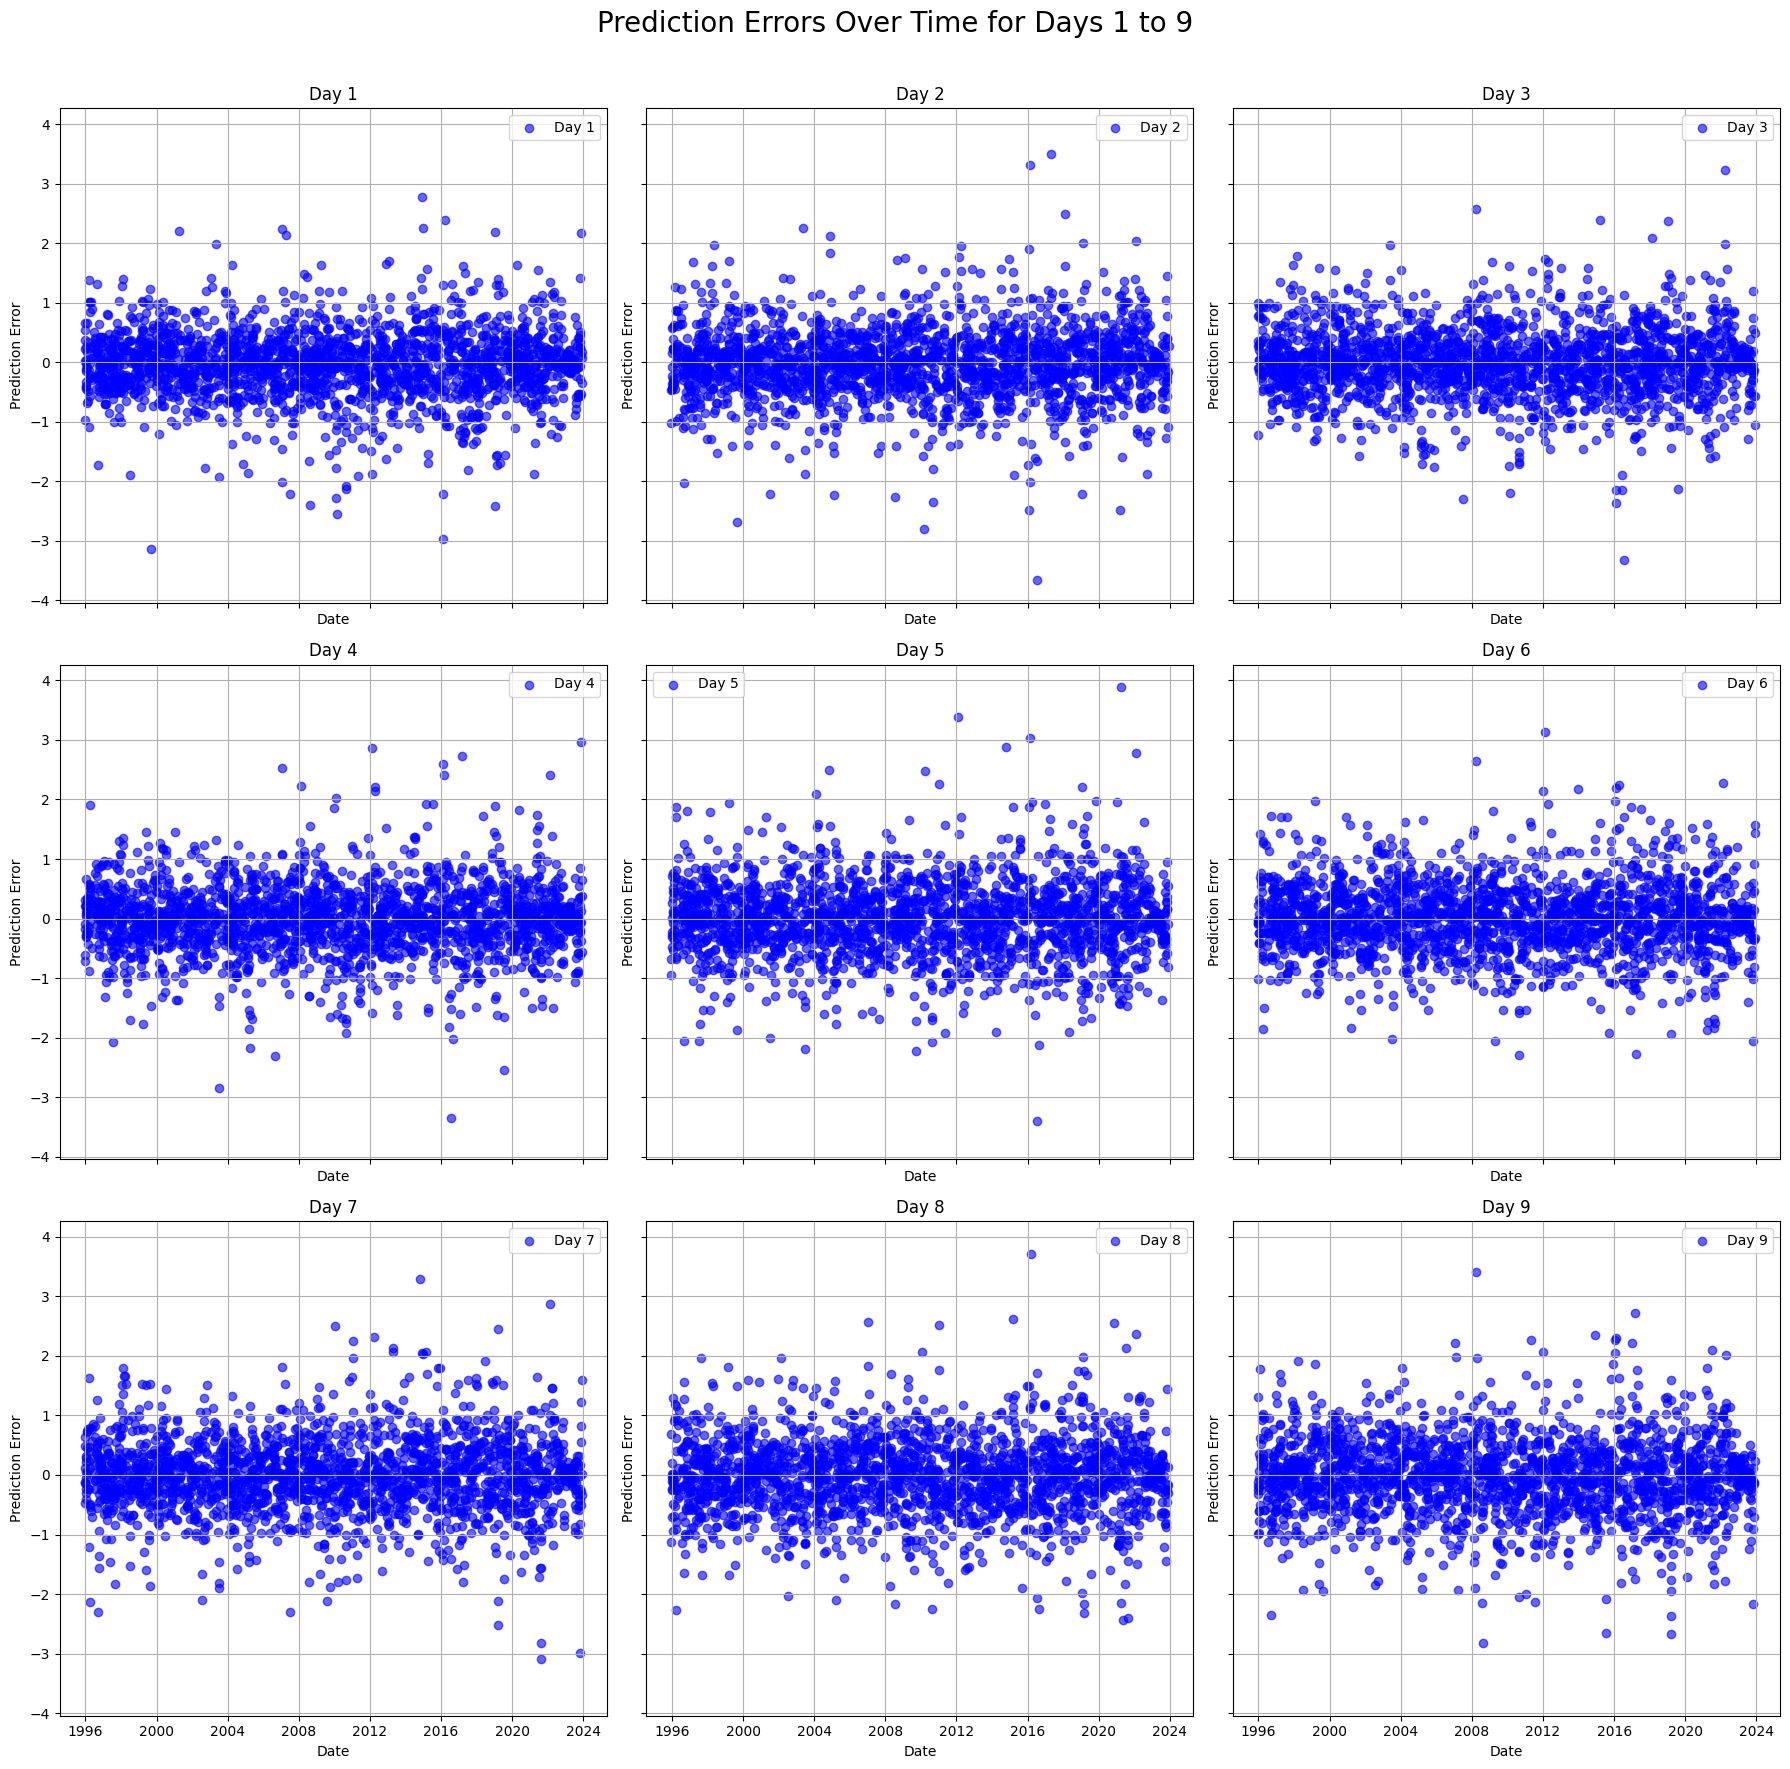

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
import xgboost as xgb

# 假设我们已有数据集 data 和 XGBoost 模型 xgboost_regressor
# 预测天数
prediction_days_extended = [1, 2, 3, 4, 5, 6, 7, 8, 9]
repeats = 10

# 将年、月、日合并成日期列
data['date'] = pd.to_datetime(data[['year', 'month', 'day']])

# 字典存储每个预测天数的预测值和实际值
predictions_vs_actuals = {}

# Collect predictions and actuals for each prediction day with XGBoost
for prediction_day in prediction_days_extended:
    # Shift the CO2_value column to create the target for the specified prediction day
    data[f'CO2_day_{prediction_day}'] = data['CO2_value'].shift(-prediction_day)

    # Drop rows with NaN values after shifting to ensure data is clean
    data_cleaned = data.dropna(subset=[f'CO2_day_{prediction_day}', 'CO_mean_past_7', 'CO_std_past_7', 'N2O_mean_past_7', 'N2O_std_past_7', 'CH4_mean_past_7', 'CH4_std_past_7', 'date'])

    # Define features and target for the specified prediction day
    features = data_cleaned[['CH4_value', 'N2O_value', 'CO_value', 'CO2_mean_past_7', 'CO2_std_past_7', 'CO_mean_past_7', 'CO_std_past_7', 'N2O_mean_past_7', 'N2O_std_past_7', 'CH4_mean_past_7', 'CH4_std_past_7']]
    target = data_cleaned[f'CO2_day_{prediction_day}']

    # List to store predictions and actual values for the current prediction day
    predictions_list = []
    actuals_list = []
    dates_list = []  # 新增列表用于存储日期

    # Perform train-test split
    X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

    # Train the XGBoost model
    xgboost_regressor = xgb.XGBRegressor()
    xgboost_regressor.fit(X_train, y_train)

    # Predict on the test set
    y_pred = xgboost_regressor.predict(X_test)

    # Collect predictions, actual values, and corresponding dates
    predictions_list.extend(y_pred)
    actuals_list.extend(y_test)
    dates_list.extend(data_cleaned.loc[y_test.index, 'date'])  # 获取对应的日期

    # Store predictions, actual values, and dates for the current prediction day
    predictions_vs_actuals[f'Day {prediction_day}'] = {'Predictions': predictions_list, 'Actuals': actuals_list, 'Dates': dates_list}

# Convert the predictions vs actuals dictionary to a DataFrame for easier analysis
predictions_vs_actuals_df = pd.DataFrame.from_dict(predictions_vs_actuals, orient='index').apply(pd.Series.explode).reset_index()

# 计算误差
predictions_vs_actuals_df['Error'] = predictions_vs_actuals_df['Actuals'] - predictions_vs_actuals_df['Predictions']

# 绘制3x3的图，每个图表示一天，从Day 1到Day 9
fig, axes = plt.subplots(3, 3, figsize=(18, 18), sharex=True, sharey=True)
fig.suptitle('Prediction Errors Over Time for Days 1 to 9', fontsize=20)

for i, prediction_day in enumerate(prediction_days_extended):
    ax = axes[i//3, i%3]
    day_data = predictions_vs_actuals_df[predictions_vs_actuals_df['index'] == f'Day {prediction_day}']
    ax.scatter(day_data['Dates'], day_data['Error'], label=f'Day {prediction_day}', color='blue', alpha=0.6)
    ax.set_title(f'Day {prediction_day}')
    ax.set_xlabel('Date')
    ax.set_ylabel('Prediction Error')
    ax.legend()
    ax.grid(True)

plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()


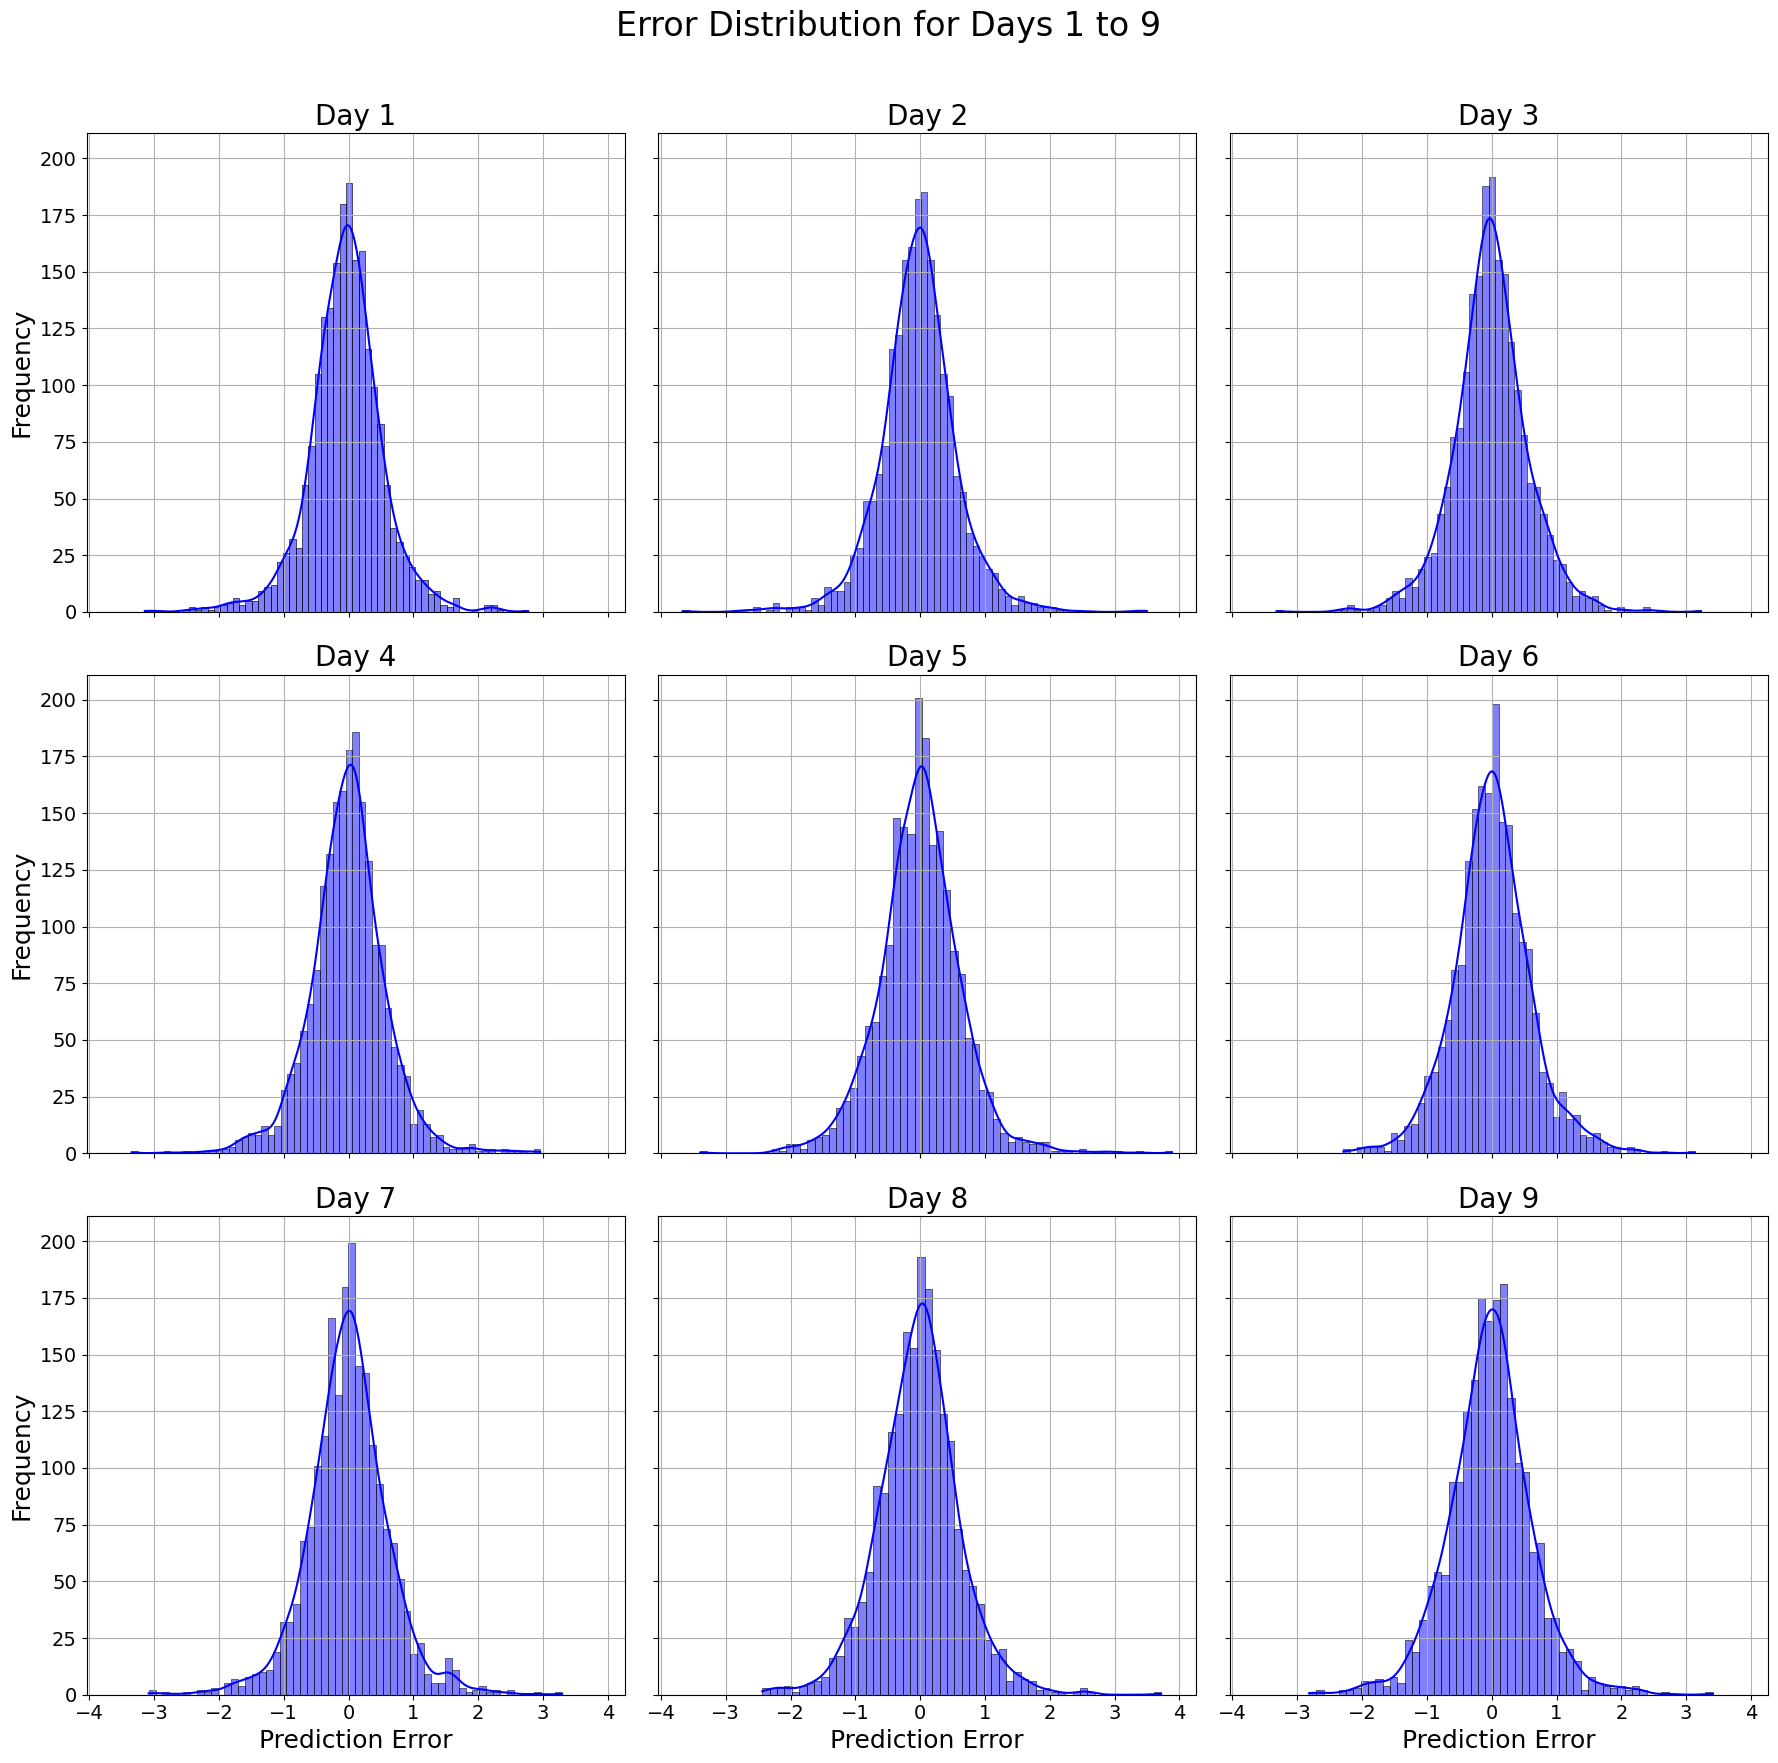

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
import xgboost as xgb

# 假设我们已有数据集 data 和 XGBoost 模型 xgboost_regressor
# 预测天数
prediction_days_extended = [1, 2, 3, 4, 5, 6, 7, 8, 9]
repeats = 10

# 将年、月、日合并成日期列
data['date'] = pd.to_datetime(data[['year', 'month', 'day']])

# 字典存储每个预测天数的预测值和实际值
predictions_vs_actuals = {}

# Collect predictions and actuals for each prediction day with XGBoost
for prediction_day in prediction_days_extended:
    # Shift the CO2_value column to create the target for the specified prediction day
    data[f'CO2_day_{prediction_day}'] = data['CO2_value'].shift(-prediction_day)

    # Drop rows with NaN values after shifting to ensure data is clean
    data_cleaned = data.dropna(subset=[f'CO2_day_{prediction_day}', 'CO_mean_past_7', 'CO_std_past_7', 'N2O_mean_past_7', 'N2O_std_past_7', 'CH4_mean_past_7', 'CH4_std_past_7', 'date'])

    # Define features and target for the specified prediction day
    features = data_cleaned[['CH4_value', 'N2O_value', 'CO_value', 'CO2_mean_past_7', 'CO2_std_past_7', 'CO_mean_past_7', 'CO_std_past_7', 'N2O_mean_past_7', 'N2O_std_past_7', 'CH4_mean_past_7', 'CH4_std_past_7']]
    target = data_cleaned[f'CO2_day_{prediction_day}']

    # List to store predictions and actual values for the current prediction day
    predictions_list = []
    actuals_list = []
    dates_list = []  # 新增列表用于存储日期

    # Perform train-test split
    X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

    # Train the XGBoost model
    xgboost_regressor = xgb.XGBRegressor()
    xgboost_regressor.fit(X_train, y_train)

    # Predict on the test set
    y_pred = xgboost_regressor.predict(X_test)

    # Collect predictions, actual values, and corresponding dates
    predictions_list.extend(y_pred)
    actuals_list.extend(y_test)
    dates_list.extend(data_cleaned.loc[y_test.index, 'date'])  # 获取对应的日期

    # Store predictions, actual values, and dates for the current prediction day
    predictions_vs_actuals[f'Day {prediction_day}'] = {'Predictions': predictions_list, 'Actuals': actuals_list, 'Dates': dates_list}

# Convert the predictions vs actuals dictionary to a DataFrame for easier analysis
predictions_vs_actuals_df = pd.DataFrame.from_dict(predictions_vs_actuals, orient='index').apply(pd.Series.explode).reset_index()

# 计算误差
predictions_vs_actuals_df['Error'] = predictions_vs_actuals_df['Actuals'] - predictions_vs_actuals_df['Predictions']

# 设置字体大小
plt.rcParams.update({'font.size': 14})

# 绘制3x3的图，每个图表示一天，从Day 1到Day 9的误差分布
fig, axes = plt.subplots(3, 3, figsize=(18, 18), sharex=True, sharey=True)
fig.suptitle('Error Distribution for Days 1 to 9', fontsize=24)

for i, prediction_day in enumerate(prediction_days_extended):
    ax = axes[i//3, i%3]
    day_data = predictions_vs_actuals_df[predictions_vs_actuals_df['index'] == f'Day {prediction_day}']
    sns.histplot(day_data['Error'], kde=True, ax=ax, color='blue')
    ax.set_title(f'Day {prediction_day}', fontsize=20)
    ax.set_xlabel('Prediction Error', fontsize=18)
    ax.set_ylabel('Frequency', fontsize=18)
    ax.grid(True)

plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()


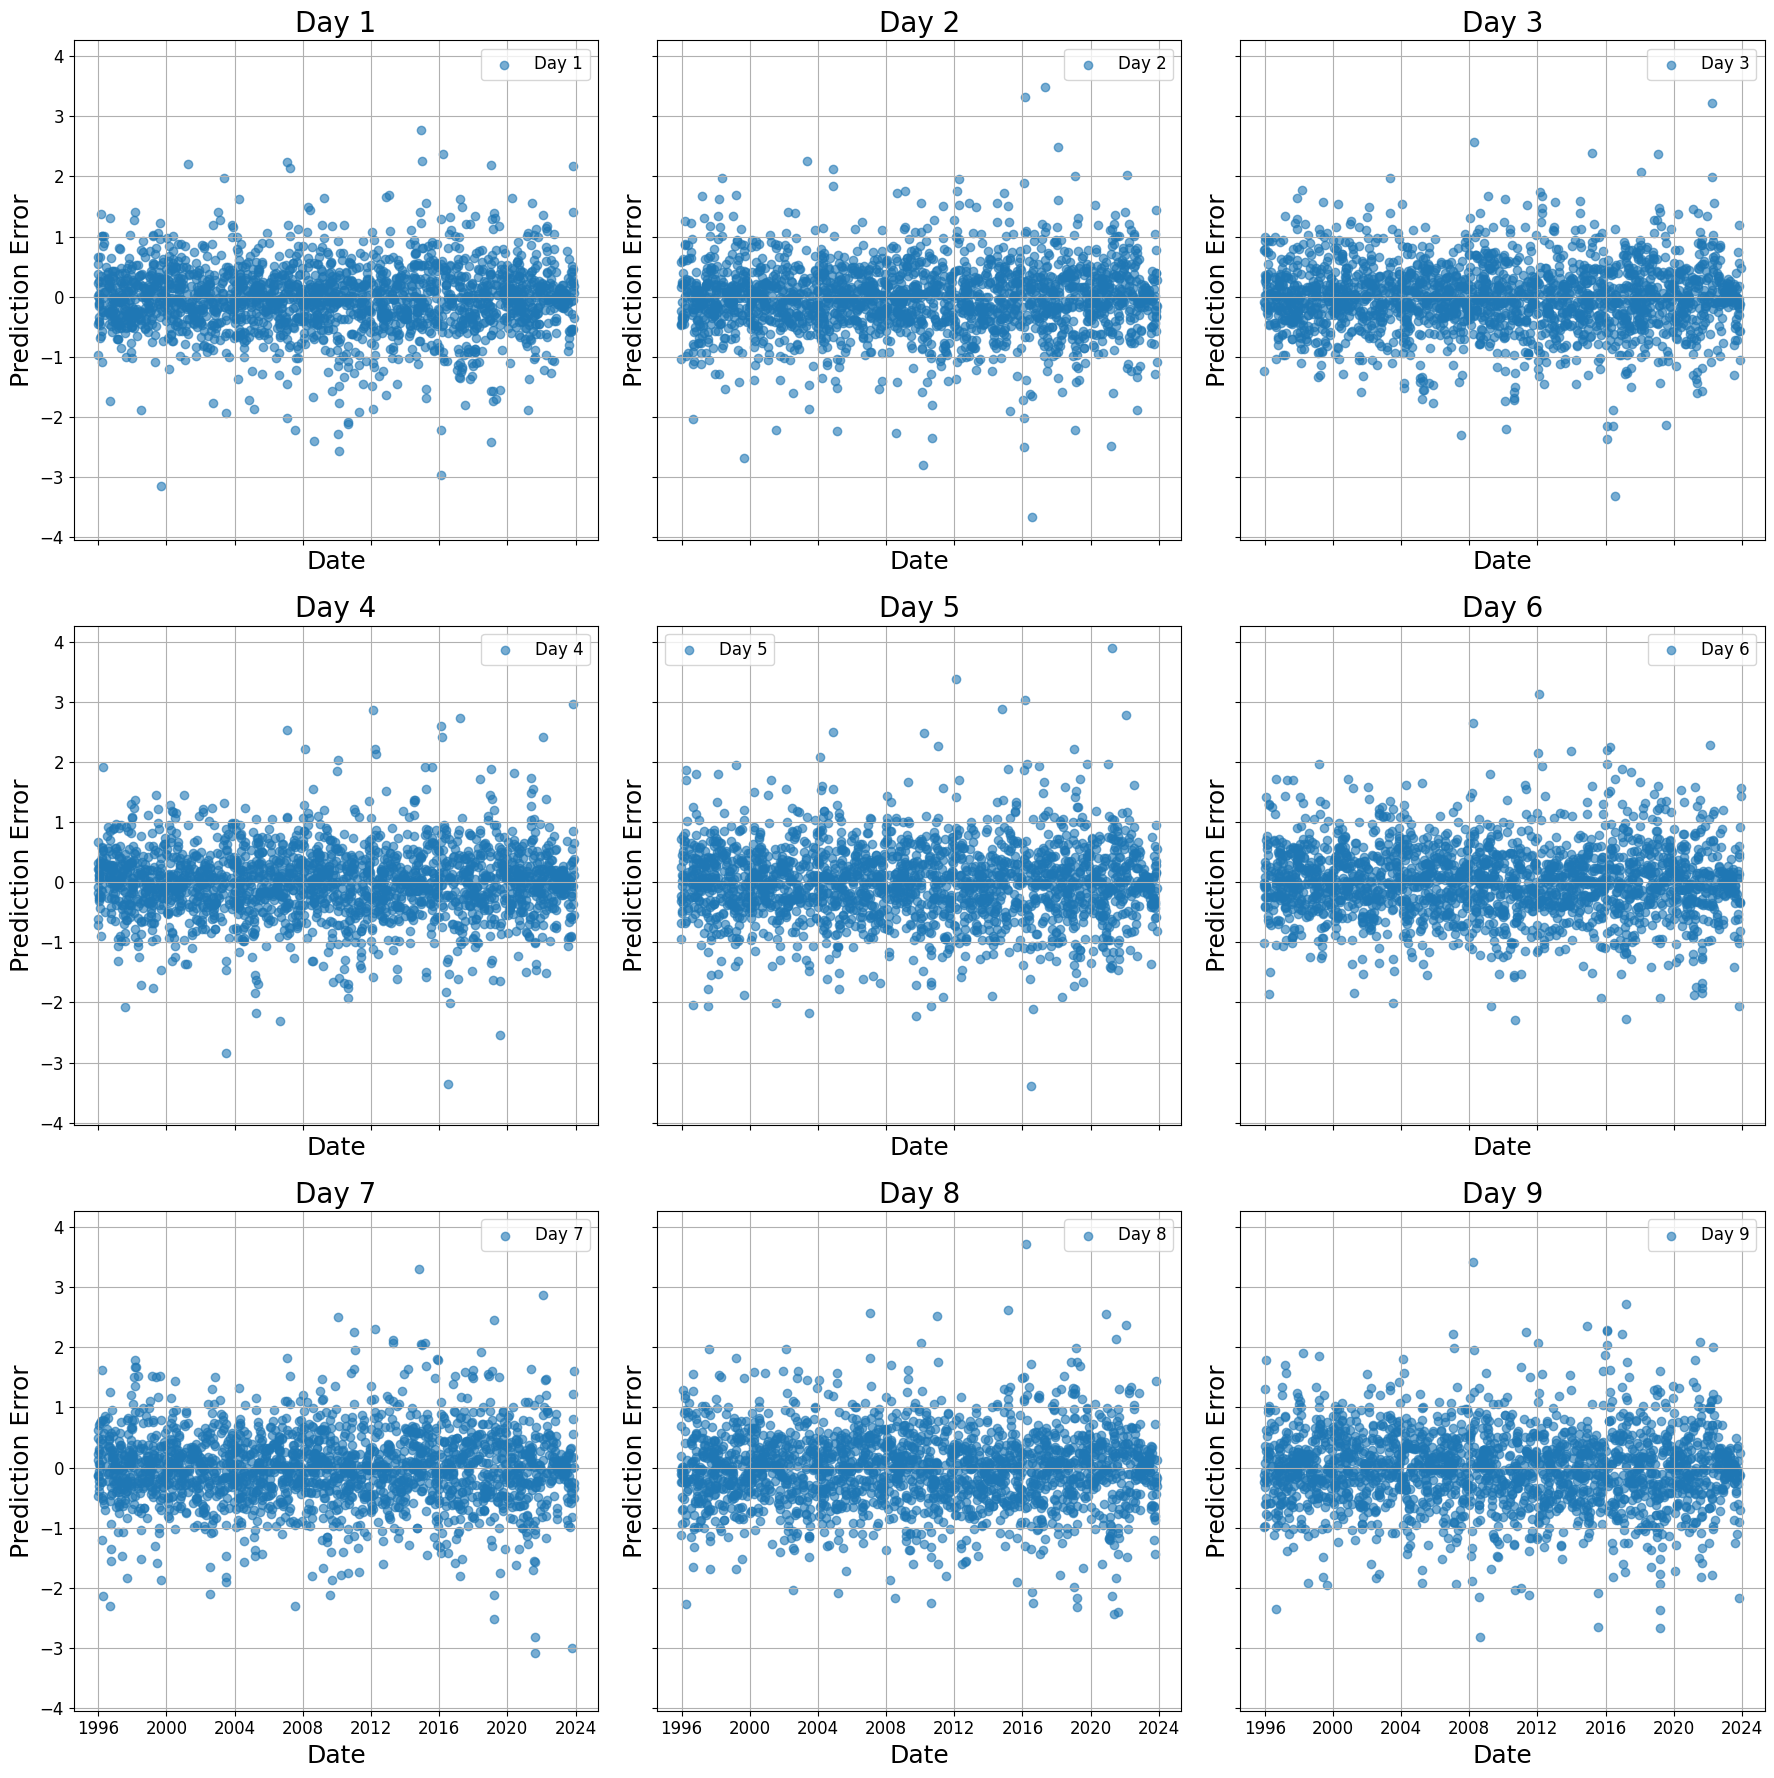

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
import xgboost as xgb

# 假设我们已有数据集 data 和 XGBoost 模型 xgboost_regressor
# 预测天数
prediction_days_extended = [1, 2, 3, 4, 5, 6, 7, 8, 9]
repeats = 10

# 将年、月、日合并成日期列
data['date'] = pd.to_datetime(data[['year', 'month', 'day']])

# 字典存储每个预测天数的预测值和实际值
predictions_vs_actuals = {}

# Collect predictions and actuals for each prediction day with XGBoost
for prediction_day in prediction_days_extended:
    # Shift the CO2_value column to create the target for the specified prediction day
    data[f'CO2_day_{prediction_day}'] = data['CO2_value'].shift(-prediction_day)

    # Drop rows with NaN values after shifting to ensure data is clean
    data_cleaned = data.dropna(subset=[f'CO2_day_{prediction_day}', 'CO_mean_past_7', 'CO_std_past_7', 'N2O_mean_past_7', 'N2O_std_past_7', 'CH4_mean_past_7', 'CH4_std_past_7', 'date'])

    # Define features and target for the specified prediction day
    features = data_cleaned[['CH4_value', 'N2O_value', 'CO_value', 'CO2_mean_past_7', 'CO2_std_past_7', 'CO_mean_past_7', 'CO_std_past_7', 'N2O_mean_past_7', 'N2O_std_past_7', 'CH4_mean_past_7', 'CH4_std_past_7']]
    target = data_cleaned[f'CO2_day_{prediction_day}']

    # List to store predictions and actual values for the current prediction day
    predictions_list = []
    actuals_list = []
    dates_list = []  # 新增列表用于存储日期

    # Perform train-test split
    X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

    # Train the XGBoost model
    xgboost_regressor = xgb.XGBRegressor()
    xgboost_regressor.fit(X_train, y_train)

    # Predict on the test set
    y_pred = xgboost_regressor.predict(X_test)

    # Collect predictions, actual values, and corresponding dates
    predictions_list.extend(y_pred)
    actuals_list.extend(y_test)
    dates_list.extend(data_cleaned.loc[y_test.index, 'date'])  # 获取对应的日期

    # Store predictions, actual values, and dates for the current prediction day
    predictions_vs_actuals[f'Day {prediction_day}'] = {'Predictions': predictions_list, 'Actuals': actuals_list, 'Dates': dates_list}

# Convert the predictions vs actuals dictionary to a DataFrame for easier analysis
predictions_vs_actuals_df = pd.DataFrame.from_dict(predictions_vs_actuals, orient='index').apply(pd.Series.explode).reset_index()

# 计算误差
predictions_vs_actuals_df['Error'] = predictions_vs_actuals_df['Actuals'] - predictions_vs_actuals_df['Predictions']

# 绘制3×3网格图，每个子图表示一天的预测误差
fig, axes = plt.subplots(3, 3, figsize=(18, 18), sharex=True, sharey=True)
axes = axes.flatten()

for i, prediction_day in enumerate(prediction_days_extended):
    day_data = predictions_vs_actuals_df[predictions_vs_actuals_df['index'] == f'Day {prediction_day}']
    axes[i].scatter(day_data['Dates'], day_data['Error'], label=f'Day {prediction_day}', alpha=0.6)
    axes[i].set_title(f'Day {prediction_day}', fontsize=20)
    axes[i].set_xlabel('Date', fontsize=18)
    axes[i].set_ylabel('Prediction Error', fontsize=18)
    axes[i].legend(fontsize=12)
    axes[i].tick_params(axis='both', which='major', labelsize=12)
    axes[i].grid(True)

plt.tight_layout()
plt.show()


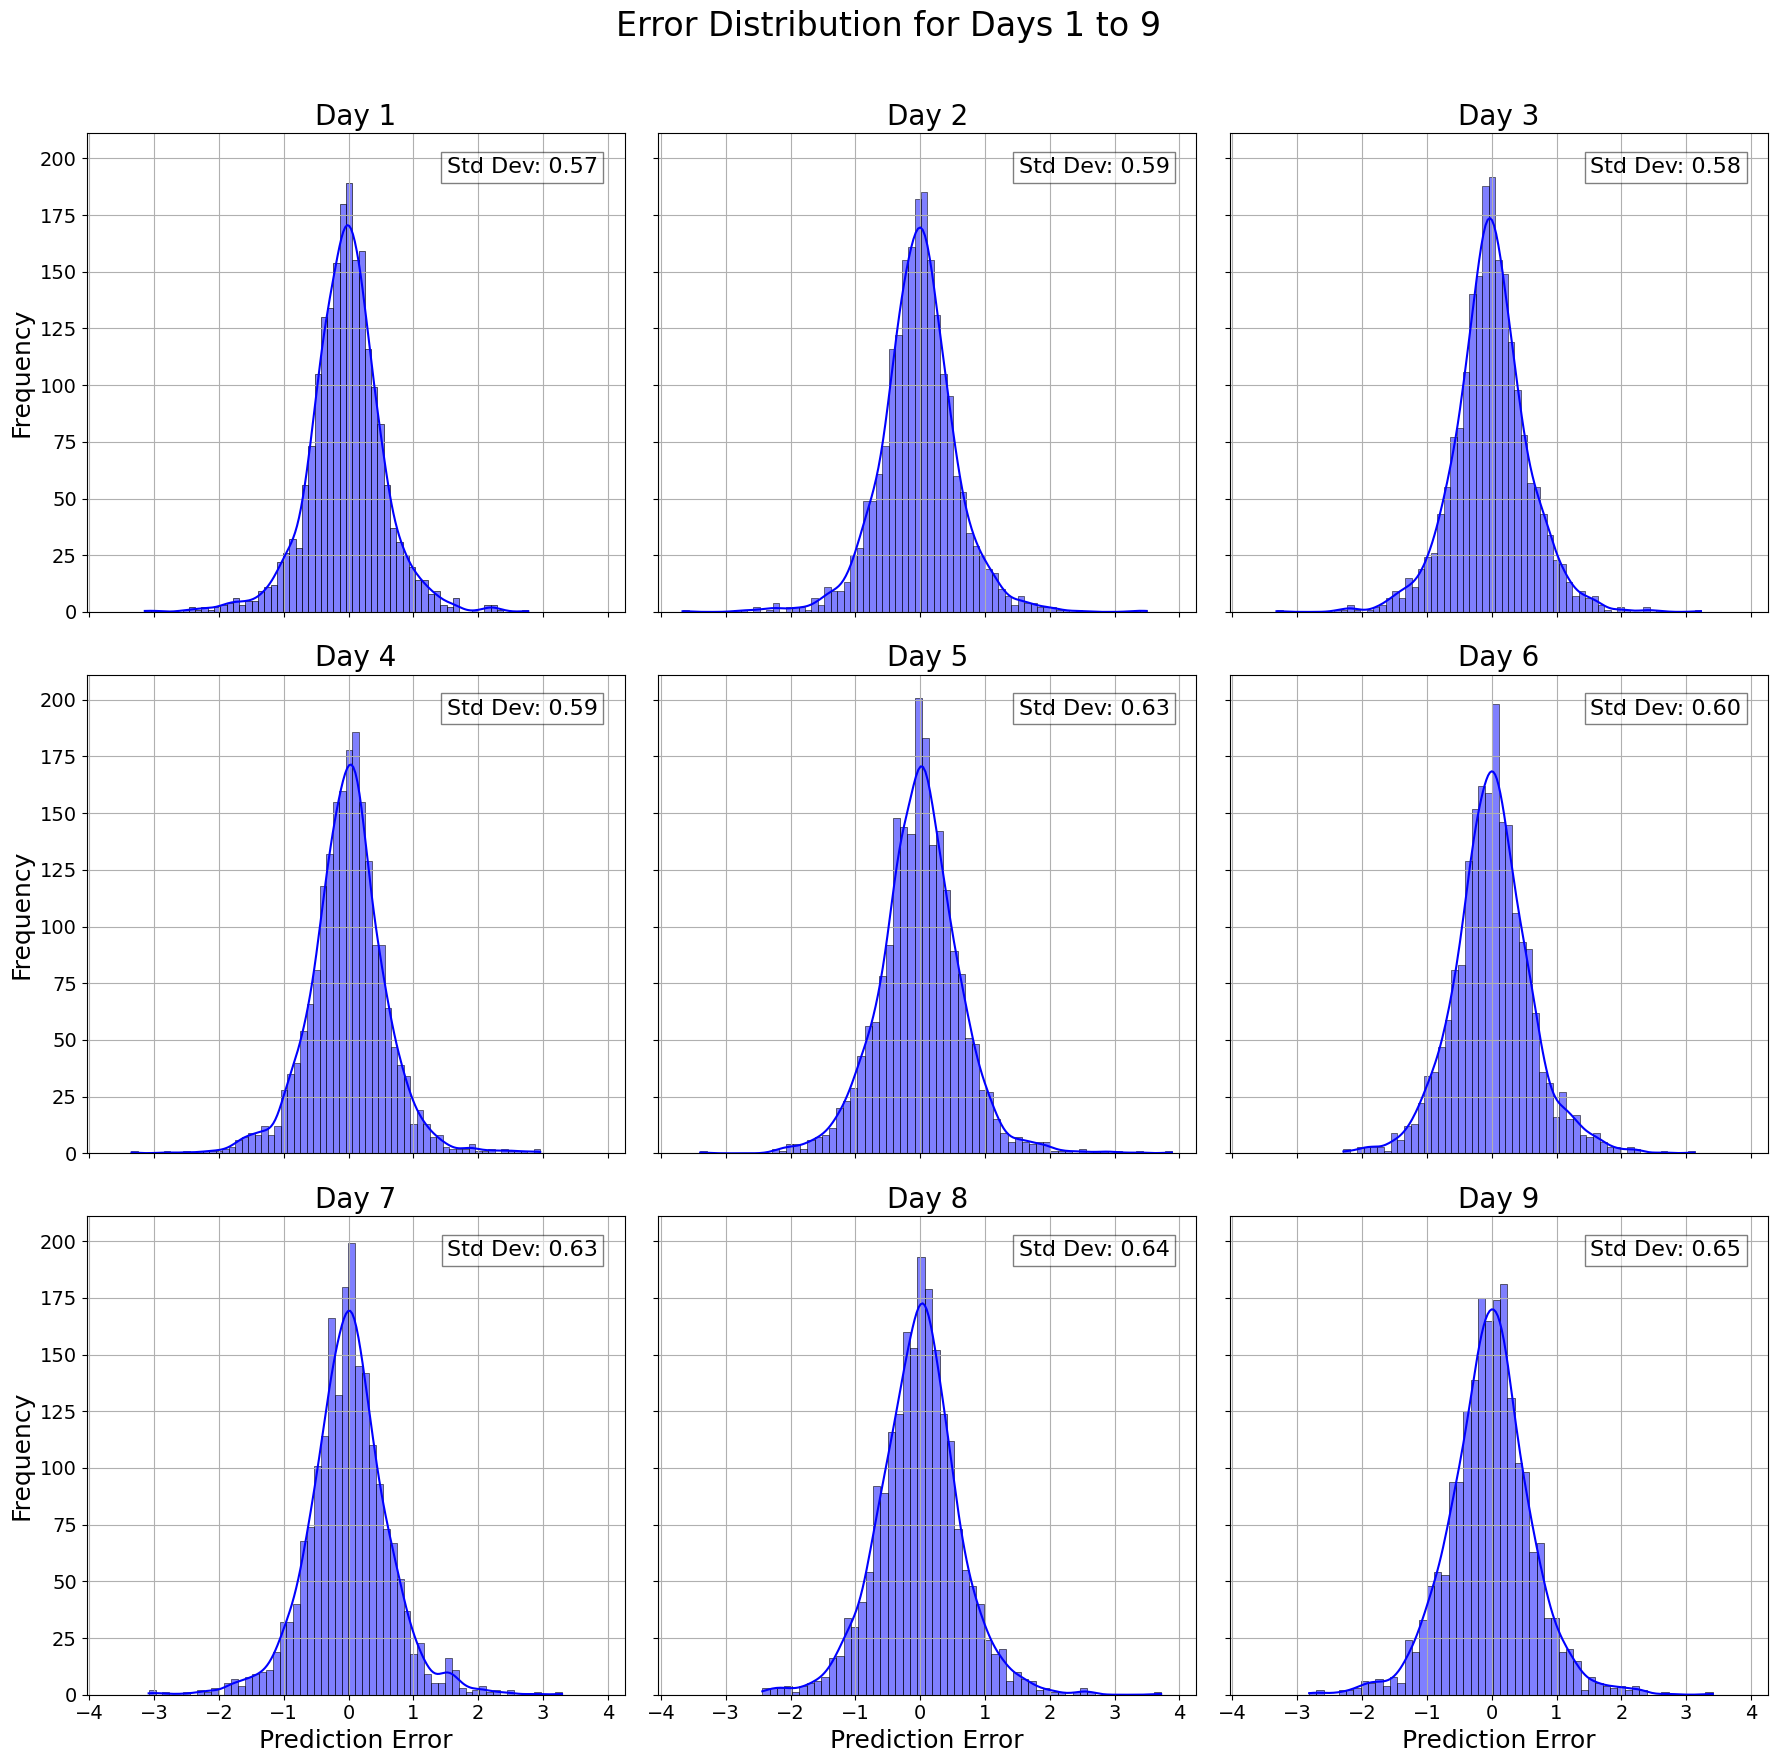

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
import xgboost as xgb

# 假设我们已有数据集 data 和 XGBoost 模型 xgboost_regressor
# 预测天数
prediction_days_extended = [1, 2, 3, 4, 5, 6, 7, 8, 9]
repeats = 10

# 将年、月、日合并成日期列
data['date'] = pd.to_datetime(data[['year', 'month', 'day']])

# 字典存储每个预测天数的预测值和实际值
predictions_vs_actuals = {}

# Collect predictions and actuals for each prediction day with XGBoost
for prediction_day in prediction_days_extended:
    # Shift the CO2_value column to create the target for the specified prediction day
    data[f'CO2_day_{prediction_day}'] = data['CO2_value'].shift(-prediction_day)

    # Drop rows with NaN values after shifting to ensure data is clean
    data_cleaned = data.dropna(subset=[f'CO2_day_{prediction_day}', 'CO_mean_past_7', 'CO_std_past_7', 'N2O_mean_past_7', 'N2O_std_past_7', 'CH4_mean_past_7', 'CH4_std_past_7', 'date'])

    # Define features and target for the specified prediction day
    features = data_cleaned[['CH4_value', 'N2O_value', 'CO_value', 'CO2_mean_past_7', 'CO2_std_past_7', 'CO_mean_past_7', 'CO_std_past_7', 'N2O_mean_past_7', 'N2O_std_past_7', 'CH4_mean_past_7', 'CH4_std_past_7']]
    target = data_cleaned[f'CO2_day_{prediction_day}']

    # List to store predictions and actual values for the current prediction day
    predictions_list = []
    actuals_list = []
    dates_list = []  # 新增列表用于存储日期

    # Perform train-test split
    X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

    # Train the XGBoost model
    xgboost_regressor = xgb.XGBRegressor()
    xgboost_regressor.fit(X_train, y_train)

    # Predict on the test set
    y_pred = xgboost_regressor.predict(X_test)

    # Collect predictions, actual values, and corresponding dates
    predictions_list.extend(y_pred)
    actuals_list.extend(y_test)
    dates_list.extend(data_cleaned.loc[y_test.index, 'date'])  # 获取对应的日期

    # Store predictions, actual values, and dates for the current prediction day
    predictions_vs_actuals[f'Day {prediction_day}'] = {'Predictions': predictions_list, 'Actuals': actuals_list, 'Dates': dates_list}

# Convert the predictions vs actuals dictionary to a DataFrame for easier analysis
predictions_vs_actuals_df = pd.DataFrame.from_dict(predictions_vs_actuals, orient='index').apply(pd.Series.explode).reset_index()

# 计算误差
predictions_vs_actuals_df['Error'] = predictions_vs_actuals_df['Actuals'] - predictions_vs_actuals_df['Predictions']

# 设置字体大小
plt.rcParams.update({'font.size': 14})

# 绘制3x3的图，每个图表示一天，从Day 1到Day 9的误差分布
fig, axes = plt.subplots(3, 3, figsize=(18, 18), sharex=True, sharey=True)
fig.suptitle('Error Distribution for Days 1 to 9', fontsize=24)

for i, prediction_day in enumerate(prediction_days_extended):
    ax = axes[i//3, i%3]
    day_data = predictions_vs_actuals_df[predictions_vs_actuals_df['index'] == f'Day {prediction_day}']
    std_dev = day_data['Error'].std()  # 计算标准差
    sns.histplot(day_data['Error'], kde=True, ax=ax, color='blue')
    ax.set_title(f'Day {prediction_day}', fontsize=20)
    ax.set_xlabel('Prediction Error', fontsize=18)
    ax.set_ylabel('Frequency', fontsize=18)
    ax.grid(True)
    # 在图上标注标准差
    ax.text(0.95, 0.95, f'Std Dev: {std_dev:.2f}', transform=ax.transAxes, ha='right', va='top', fontsize=16, bbox=dict(facecolor='white', alpha=0.5))

plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()
